<a href="https://colab.research.google.com/github/rifkifauzi24/Data-Science-Project/blob/main/Kaggle/USA_Census_Income_Analysis_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.&nbsp;Importing Data and Libraries

In [ ]:
import kagglehub
tawfikelmetwally_census_income_dataset_path = kagglehub.dataset_download('tawfikelmetwally/census-income-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#machine learning libraries:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train= pd.read_csv(r"/kaggle/input/census-income-dataset/adult.csv")
df_test= pd.read_csv(r"/kaggle/input/census-income-dataset/adult.test.csv")

df_train.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Final Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   EducationNum    32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  capital loss    32561 non-null  int64 
 12  Hours per Week  32561 non-null  int64 
 13  Native Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_train.nunique()

,0
Age,73
Workclass,9
Final Weight,21648
Education,16
EducationNum,16
Marital Status,7
Occupation,15
Relationship,6
Race,5
Gender,2


In [ ]:
df_test.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [ ]:
df_test.nunique()

,0
25,73
Private,9
226802,12786
11th,16
7,16
Never-married,7
Machine-op-inspct,15
Own-child,6
Black,5
Male,2


Kolom pada df_test (data test) belum diberi nama

In [ ]:
# Cek Nama Kolom Data Train
print('Kolom Data Train')
print(df_train.columns.tolist())


# Ubah nama kolom data test agar jadi sama dengan data train

df_test.columns = df_train.columns

# Cek hasilnya

print('\nKolom Data Test Setelah Disamakan')
print(df_test.columns.tolist())

Kolom Data Train
['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country', 'Income']

Kolom Data Test Setelah Disamakan
['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country', 'Income']


In [ ]:
# Untuk memudahkan proses EDA dan Pre-Processing, sementara dataset digabungkan

df_gabung = pd.concat([df_train, df_test], axis=0)

In [ ]:
df_gabung.tail()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16279,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [ ]:
# cek df isnul

df_gabung.isnull().sum()

,0
Age,0
Workclass,0
Final Weight,0
Education,0
EducationNum,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Gender,0


# 2.&nbsp;Exploratory Data Analysis (EDA)

## 2.1 Inspeksi Awal

In [ ]:
# Check the shape of the dataset (number of rows and columns)
df_gabung.shape

# Get information about the dataset (data types, missing values, etc.)
df_gabung.info()

# Get descriptive statistics for numerical features
df_gabung.describe()

# Check for missing values
df_gabung.isnull().sum()
print('-' * 50)

# Explore the unique values in categorical features
for col in df_gabung.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}': {df_gabung[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  int64 
 1   Workclass       48841 non-null  object
 2   Final Weight    48841 non-null  int64 
 3   Education       48841 non-null  object
 4   EducationNum    48841 non-null  int64 
 5   Marital Status  48841 non-null  object
 6   Occupation      48841 non-null  object
 7   Relationship    48841 non-null  object
 8   Race            48841 non-null  object
 9   Gender          48841 non-null  object
 10  Capital Gain    48841 non-null  int64 
 11  capital loss    48841 non-null  int64 
 12  Hours per Week  48841 non-null  int64 
 13  Native Country  48841 non-null  object
 14  Income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB
--------------------------------------------------
Unique values in 'Workclass': [' State-gov' ' S

In [ ]:
df_gabung['Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [ ]:
df_gabung['Income'] = df_gabung['Income'].str.replace('.', '', regex=False)

In [ ]:
df_gabung['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
df_gabung['Income'].value_counts()

,count
Income,
<=50K,37154
>50K,11687


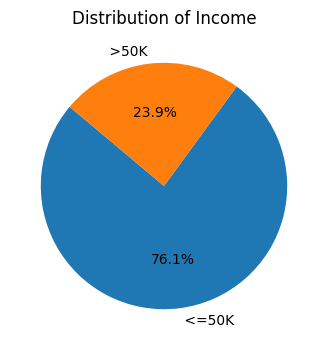

In [ ]:
import matplotlib.pyplot as plt
# Change 'income' to 'Income'
income_counts = df_gabung['Income'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Income')
plt.show()

## 2.2 Analisis Univariat

Tujuan Analisis Univariat
Mengetahui karakteristik data → Apakah data berdistribusi normal, menceng kiri/kanan, atau memiliki outlier.

Mengidentifikasi ukuran pemusatan dan penyebaran → Seperti mean, median, modus, standar deviasi, dan rentang.

Menganalisis distribusi frekuensi → Untuk melihat pola data dalam kategori tertentu.

Menyiapkan data untuk analisis lebih lanjut → Seperti regresi atau analisis multivariat.

### Fitur Numerikal

In [ ]:
# 1. Basic Statistical Analysis
print("Basic Statistical Analysis for Numerical Features:")
print("-" * 50)
numerical_features = df_gabung.select_dtypes(include=['int64', 'float64']).columns
print(df_gabung[numerical_features].describe())

Basic Statistical Analysis for Numerical Features:
--------------------------------------------------
                Age  Final Weight  EducationNum  Capital Gain  capital loss  \
count  48841.000000  4.884100e+04  48841.000000  48841.000000  48841.000000   
mean      38.643865  1.896634e+05     10.078152   1079.089720     87.504105   
std       13.710511  1.056050e+05      2.570961   7452.093748    403.008483   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.175490e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.781420e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.376460e+05     12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06     16.000000  99999.000000   4356.000000   

       Hours per Week  
count    48841.000000  
mean        40.422391  
std         12.391571  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000


Histograms for Numerical Features:
--------------------------------------------------


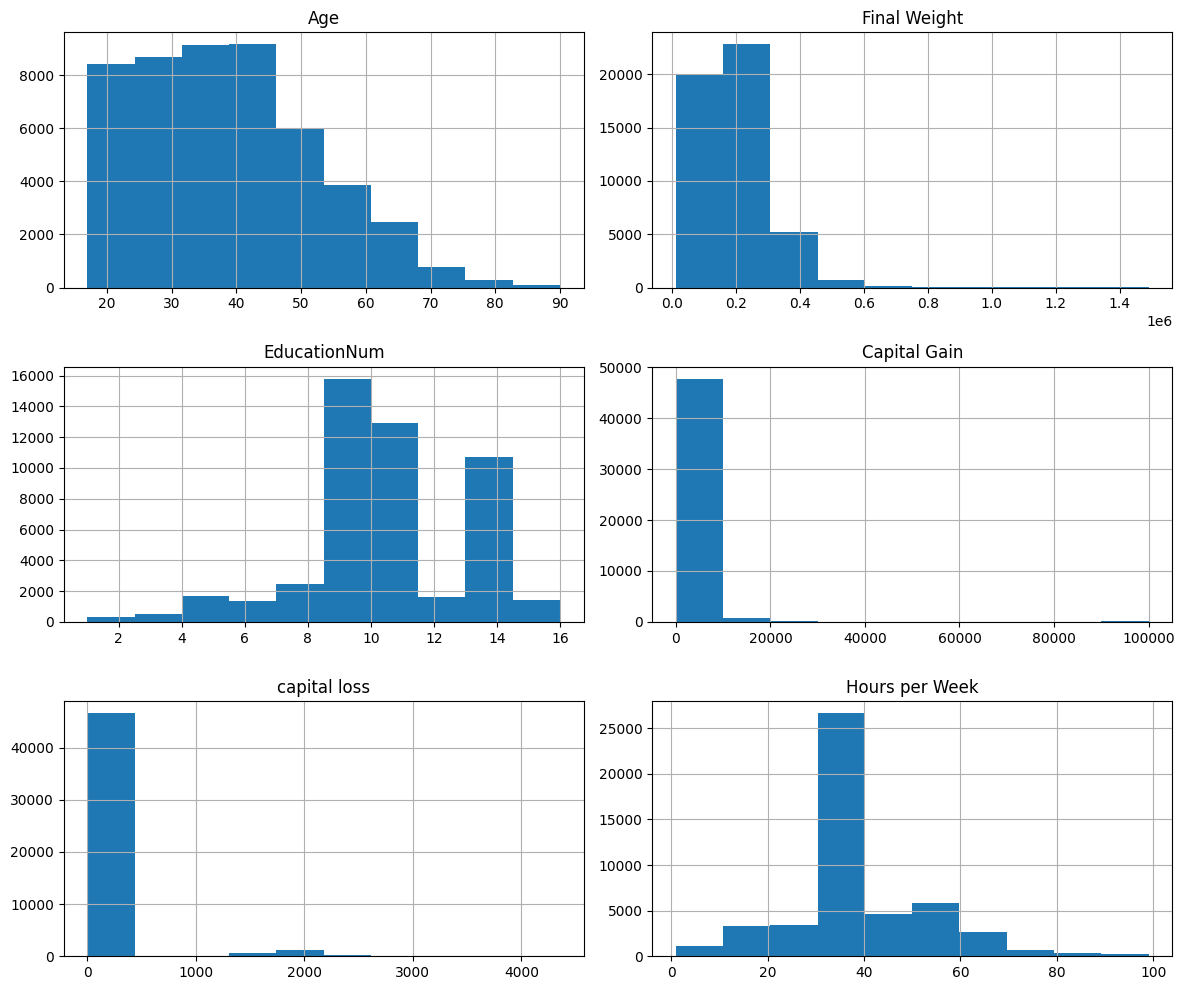


Box Plots for Numerical Features:
--------------------------------------------------


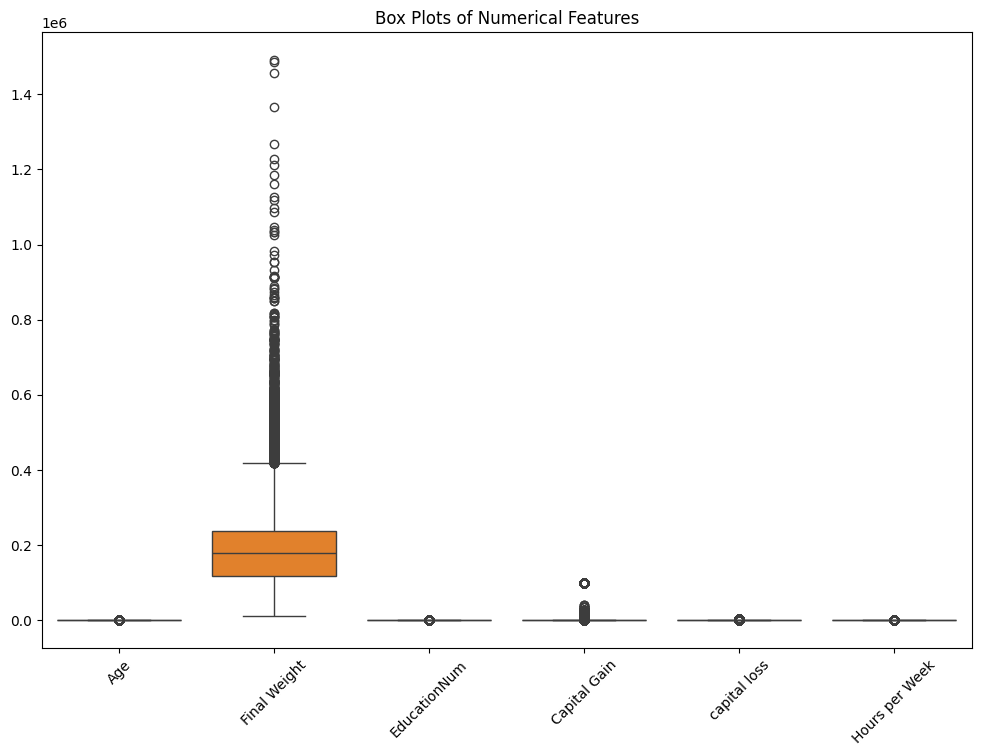

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define numerical_features in this cell to ensure it's available
numerical_features = df_gabung.select_dtypes(include=['int64', 'float64']).columns

# 2. Histograms for Numerical Features
print("\nHistograms for Numerical Features:")
print("-" * 50)
df_gabung[numerical_features].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 3. Box Plots for Numerical Features
print("\nBox Plots for Numerical Features:")
print("-" * 50)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_gabung[numerical_features])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

- EducationNum, Age, Marital Status, Workclass, Occupation, dan Relationship tampaknya menjadi fitur yang paling informatif untuk membedakan antara individu berpenghasilan rendah dan tinggi.
- Final Weight, Capital Gain (dalam bentuk mentah), dan Capital Loss (dalam bentuk mentah) kurang berkorelasi atau memiliki distribusi yang didominasi oleh nilai nol, sehingga mungkin memerlukan pra-pemrosesan tambahan atau dipertimbangkan untuk dihilangkan.
Race dan Gender mungkin memiliki pengaruh, tetapi mungkin kurang dominan dibandingkan fitur lainnya.
- Native Country tampaknya tidak informatif dalam dataset ini karena dominasi satu kategori.

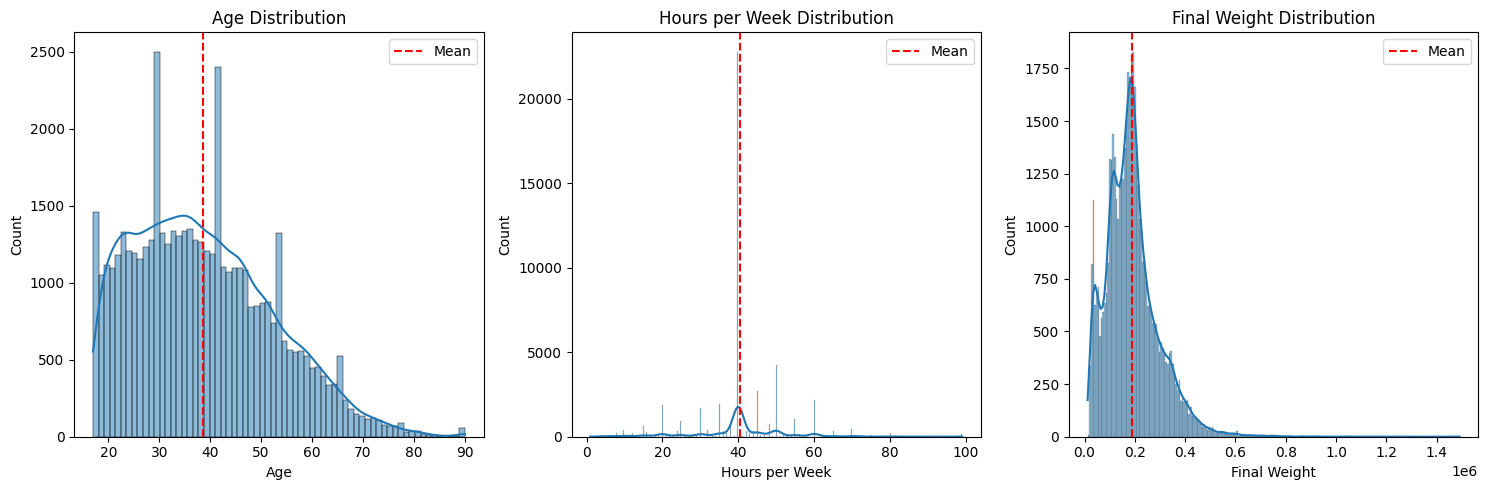

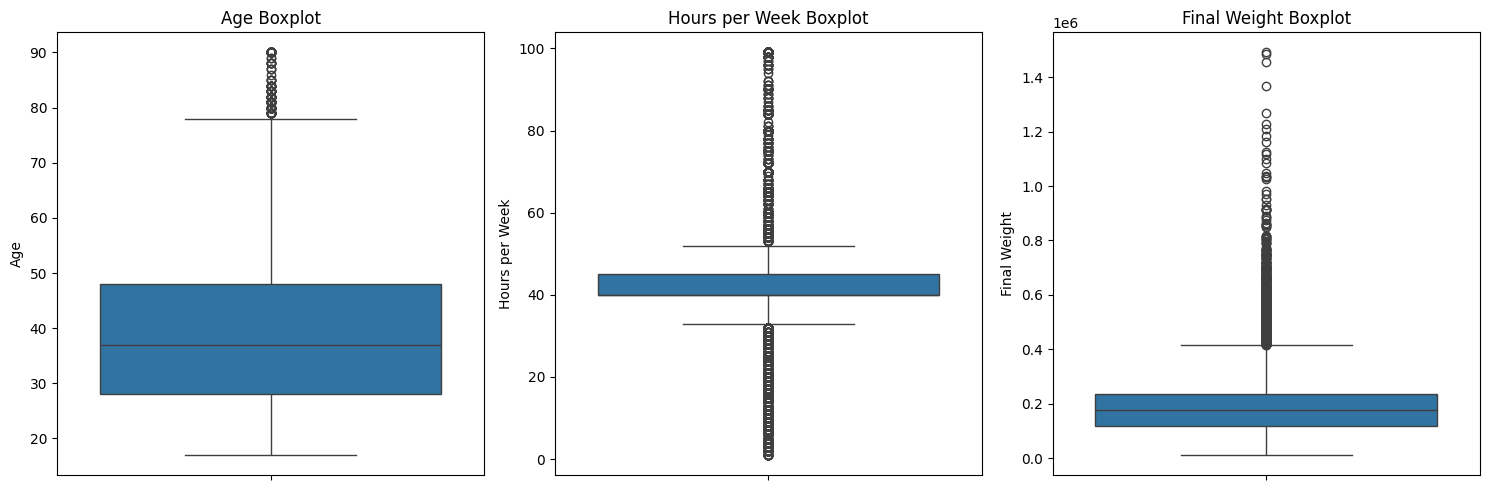

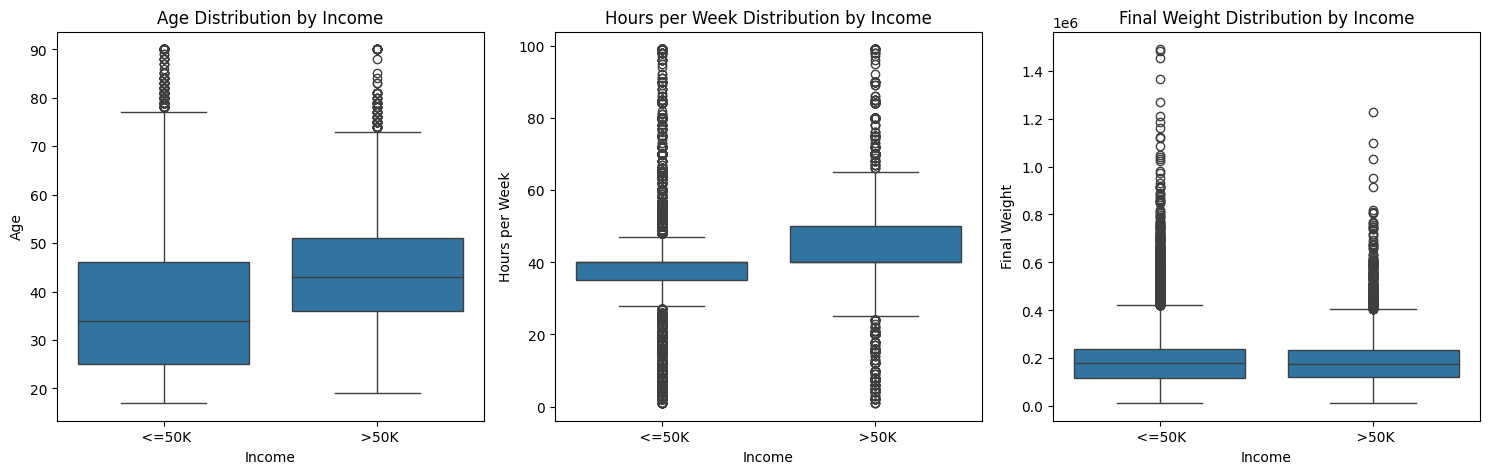


Numerical Features Summary by Income Group:
--------------------------------------------------

Age Summary by Income:
          count       mean        std   min   25%   50%   75%   max
Income                                                             
<=50K   37154.0  36.872504  14.104173  17.0  25.0  34.0  46.0  90.0
>50K    11687.0  44.275178  10.558983  19.0  36.0  43.0  51.0  90.0

Final Weight Summary by Income:
          count           mean            std      min       25%       50%  \
Income                                                                       
<=50K   37154.0  190038.576062  106578.868381  12285.0  117210.0  178811.0   
>50K    11687.0  188470.574570  102442.731958  13769.0  118942.5  176729.0   

             75%        max  
Income                       
<=50K   238917.0  1490400.0  
>50K    233505.0  1226583.0  

EducationNum Summary by Income:
          count       mean       std  min   25%   50%   75%   max
Income                                     

In [ ]:
# 2. Distribution Plots
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=df_gabung, x='Age', kde=True)
plt.title('Age Distribution')
plt.axvline(df_gabung['Age'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# Hours per Week Distribution
plt.subplot(1, 3, 2)
sns.histplot(data=df_gabung, x='Hours per Week', kde=True)
plt.title('Hours per Week Distribution')
plt.axvline(df_gabung['Hours per Week'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# Final Weight Distribution
plt.subplot(1, 3, 3)
sns.histplot(data=df_gabung, x='Final Weight', kde=True)
plt.title('Final Weight Distribution')
plt.axvline(df_gabung['Final Weight'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Box Plots for Outlier Detection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_gabung['Age'])
plt.title('Age Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_gabung['Hours per Week'])
plt.title('Hours per Week Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_gabung['Final Weight'])
plt.title('Final Weight Boxplot')

plt.tight_layout()
plt.show()

# 4. Numerical Features by Income
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Income', y='Age', data=df_gabung)
plt.title('Age Distribution by Income')

plt.subplot(1, 3, 2)
sns.boxplot(x='Income', y='Hours per Week', data=df_gabung)
plt.title('Hours per Week Distribution by Income')

plt.subplot(1, 3, 3)
sns.boxplot(x='Income', y='Final Weight', data=df_gabung)
plt.title('Final Weight Distribution by Income')

plt.tight_layout()
plt.show()

# 5. Statistical Summary by Income Group
print("\nNumerical Features Summary by Income Group:")
print("-" * 50)
for column in numerical_features:
    print(f"\n{column} Summary by Income:")
    print(df_gabung.groupby('Income')[column].describe())


**Kesimpulan:**
1. **Usia dan Pendapatan:**  
   - **Individu berpenghasilan >50K memiliki usia rata-rata lebih tua (44.25 tahun) dibandingkan individu berpenghasilan ≤50K (36.78 tahun)**.
   - Distribusi usia menunjukkan bahwa semakin tua seseorang, semakin besar kemungkinan mereka memiliki pendapatan lebih tinggi.  

2. **Final Weight Tidak Menunjukkan Perbedaan Signifikan:**  
   - **Rata-rata Final Weight antara dua kelompok pendapatan hampir sama**, sekitar **193K untuk ≤50K dan 188K untuk >50K**.
   - Ini mengindikasikan bahwa Final Weight bukan faktor utama dalam membedakan pendapatan.  

3. **Pendidikan Sangat Berpengaruh pada Pendapatan:**  
   - **Rata-rata EducationNum untuk ≤50K adalah 9.6, sedangkan untuk >50K adalah 11.6**, menunjukkan bahwa individu dengan pendidikan lebih tinggi cenderung memiliki pendapatan lebih tinggi.
   - Perbedaan ini cukup signifikan dan dapat menjadi variabel penting dalam prediksi pendapatan.  

4. **Capital Gain dan Capital Loss Didominasi oleh Nilai Nol:**  
   - **Mayoritas individu tidak memiliki capital gain atau capital loss**, dengan nilai rata-rata Capital Gain **148 untuk ≤50K** dan **4086 untuk >50K**.
   - Capital Loss juga memiliki pola serupa, dengan rata-rata **53 untuk ≤50K** dan **195 untuk >50K**.
   - Karena mayoritas nilainya nol, fitur ini mungkin kurang efektif untuk model prediksi dan bisa dihapus atau ditransformasikan dengan teknik feature engineering.  

5. **Jam Kerja Tidak Menjadi Penentu Utama Pendapatan:**  
   - **Rata-rata jam kerja per minggu hampir sama**, yaitu **40.2 jam untuk ≤50K dan 45.6 jam untuk >50K**.
   - Meski individu dengan pendapatan lebih tinggi cenderung bekerja lebih lama, perbedaannya tidak cukup besar untuk dijadikan faktor utama dalam prediksi pendapatan.  

---

**Insight untuk Model Machine Learning:**  
1. **Pendidikan (EducationNum) adalah fitur penting yang sangat berpengaruh pada pendapatan**, sehingga perlu diperhatikan dalam model.  
2. **Capital Gain dan Capital Loss memiliki mayoritas nilai nol**, sehingga bisa dihapus atau diubah dengan teknik feature engineering.  
3. **Final Weight tidak menunjukkan korelasi kuat dengan pendapatan**, sehingga bisa diabaikan dalam feature selection.  
4. **Jam kerja memiliki sedikit pengaruh terhadap pendapatan**, tetapi bisa dikombinasikan dengan jenis pekerjaan untuk melihat efek lebih lanjut.  


### Fitur Kategorikal

In [ ]:
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:

        # Get X and Y placement of label from rect.
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()-4

        # Determine vertical alignment for positive and negative values
        va = 'bottom' if y >= 0 else 'top'

        # Format the label to one decimal place
        label = int(y)    #"{}".format(y)

        # Determine the vertical shift of the label
        # based on the sign of the y value and the spacing parameter
        y_shift = spacing * (1 if y >= 0 else -1)

        # Create the annotation
        ax.annotate(label, (x, y), xytext=(0, y_shift),
                    textcoords="offset points", ha='center', va=va)

pal = ['#93bac2','#adc293','#c29793', '#E28F6B', '#76A15A', '#838477' ]

def r_color(num=1, seed=None):

    if seed == None:
        seed = np.random.randint(0, 420, size=1)
        np.random.seed(seed)

    colors = np.random.choice(pal, num, replace=False)

    # Return the colors
    return list(colors)

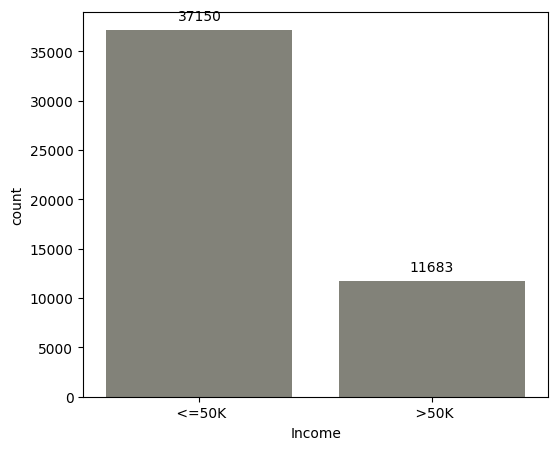

In [ ]:
Workclass_data=df_gabung['Income'].value_counts()
order= list(Workclass_data.index)

plt.figure(figsize=(6,5))
plot= sns.countplot(data=df_gabung, x='Income', order=order, palette = r_color(num=1))
add_value_labels(plot)

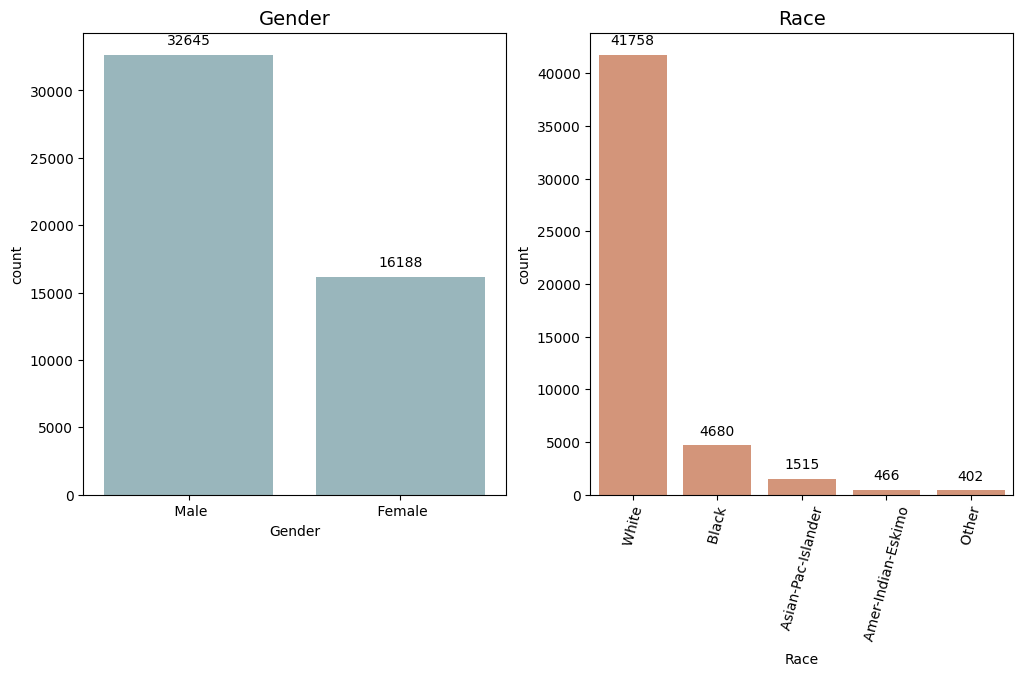

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Gender', size=14)
plot=sns.countplot(data=df_gabung, x='Gender', palette = r_color(num=1,seed=0))
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('Race', size=14)
plot=sns.countplot(data=df_gabung, x='Race', palette = r_color(num=1, seed=2))
plt.xticks(rotation=75)
add_value_labels(plot)

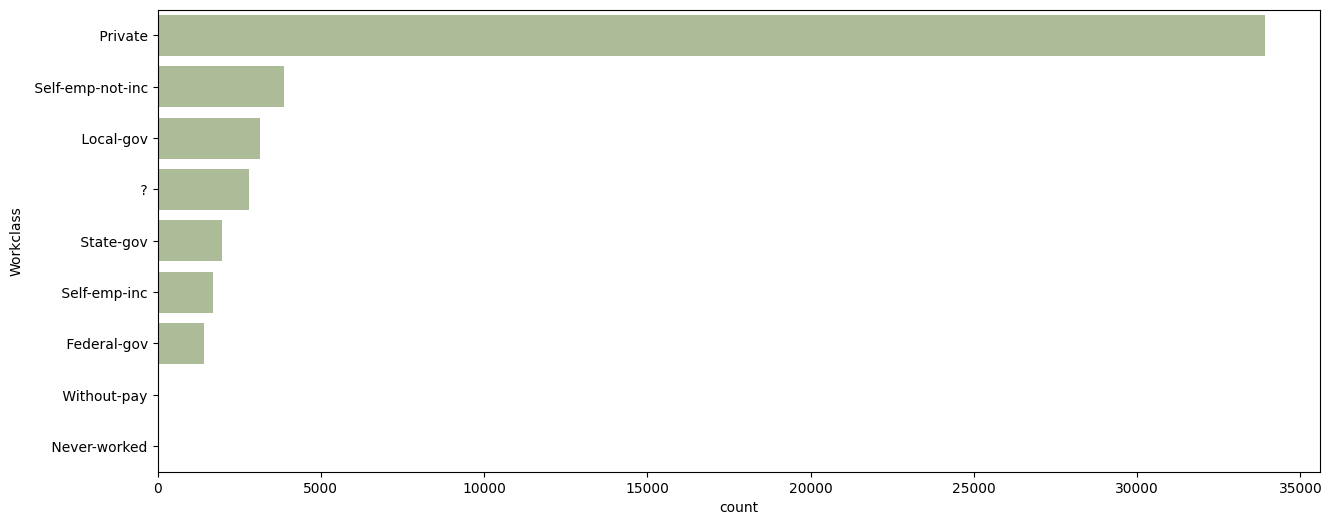

In [ ]:
Workclass_data=df_gabung['Workclass'].value_counts()
order= list(Workclass_data.index)

plt.figure(figsize=(15,6))
plot= sns.countplot(data=df_gabung, y='Workclass', orient="h", order=order,  palette = r_color(num=1))


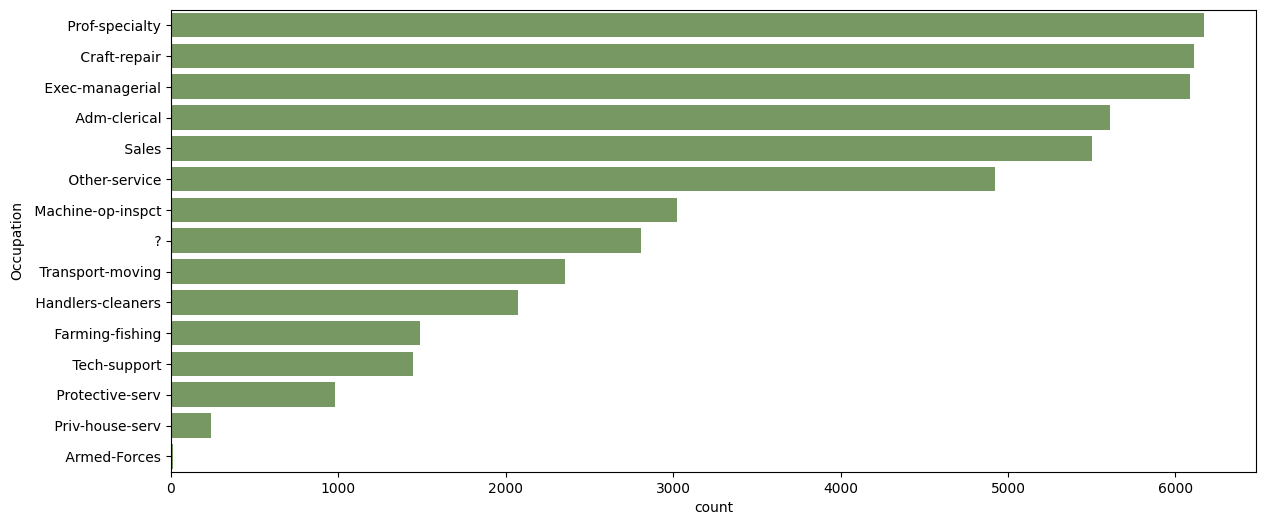

In [ ]:
Occupation_data=df_gabung['Occupation'].value_counts()
order= list(Occupation_data.index)

plt.figure(figsize=(14,6))
plot= sns.countplot(data=df_gabung, y='Occupation', orient="h", order=order, palette = r_color(num=1,seed=0))

In [ ]:
Relationship_data=df_gabung['Relationship'].value_counts()

order= list(Relationship_data.index)
values = list(Relationship_data.values)

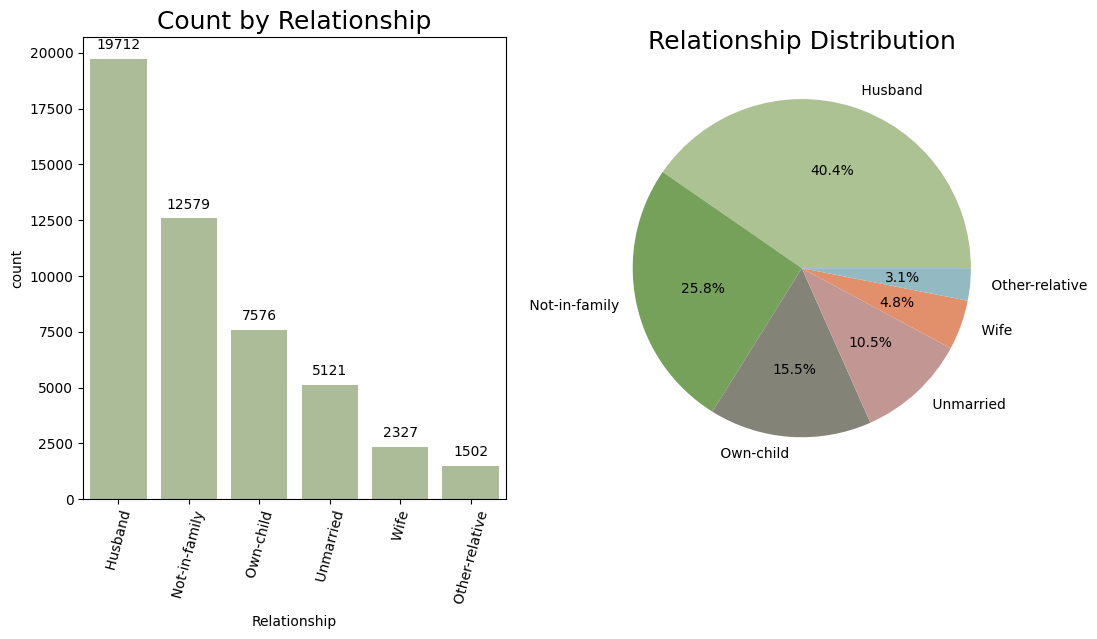

In [ ]:
plt.figure(figsize=(12,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df_gabung, x='Relationship', order=order, palette = r_color(num=1,seed=0))
plt.title('Count by Relationship', fontsize=18)
plt.xticks(rotation=75)
add_value_labels(plot1);

plt.subplot(1,2,2)
plt.pie(values, labels=order, autopct='%1.1f%%', colors= r_color(num=6,seed=0))
plt.title('Relationship Distribution', fontsize=18);

* **The majority of people are married or in a relationship.**
* **There is a significant number of unmarried people and not-in-family.**
* **There is a small number of people who are other relatives.**

In [ ]:
Education_data=df_gabung['Education'].value_counts()
order1= list(Education_data.index)

EducationNum_data=df_gabung['EducationNum'].value_counts()
order2= list(EducationNum_data.index)

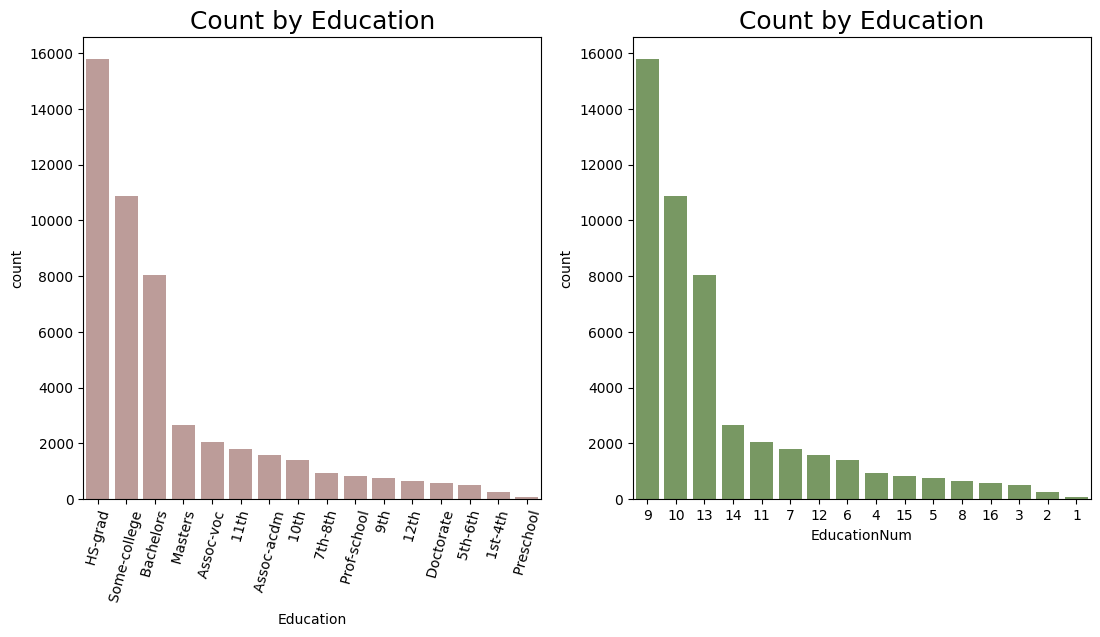

In [ ]:
plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df_gabung, x='Education', order=order1, palette = r_color(num=1,seed=0))
plt.title('Count by Education', fontsize=18)
plt.xticks(rotation=75);

plt.subplot(1,2,2)
plot2= sns.countplot(data=df_gabung, x='EducationNum', order=order2, palette = r_color(num=1,seed=42))
plt.title('Count by Education', fontsize=18);

**Dapat dilihat Kolom `Education` Berhubungan dengan Kolom `EducationNum`
Yang mana artinya:**
* **HS-grad = 9 years of education completed.**
* **Some-college = 10**
* **Bachelors = 13**
* **Masters = 14**
* **Assoc-voc = 11   Dst..**

Saya akan hapus kolom `Education`.

**Kesimpulan:**

**1. Workclass:** Sebagian besar individu bekerja di sektor swasta (Private). Sebagian kecil bekerja di pemerintahan (Local-gov, State-gov, Federal-gov) atau wiraswasta (Self-emp-not-inc, Self-emp-inc).

**2. Education:** Tingkat pendidikan yang paling umum adalah HS-grad (lulus SMA), diikuti oleh Some-college (kuliah beberapa tahun) dan Bachelors (Sarjana).

**3. Marital Status:** Sebagian besar individu telah menikah (Married-civ-spouse), diikuti oleh Never-married (belum pernah menikah) dan Divorced (bercerai).

**4. Occupation:** Pekerjaan yang paling umum adalah Prof-specialty (profesional khusus), diikuti oleh Craft-repair (perbaikan kerajinan), Exec-managerial (eksekutif manajerial), Adm-clerical (administrasi dan klerikal), dan Sales (penjualan).

**5. Relationship:** Hubungan yang paling umum adalah Husband (suami), diikuti oleh Not-in-family (tidak dalam keluarga) dan Own-child (anak sendiri).

**6. Race:** Ras yang paling umum adalah White, diikuti oleh Black dan Asian-Pac-Islander.
Gender: Mayoritas individu adalah laki-laki (Male).
Native Country: Sebagian besar individu berasal dari United-States.

**7. Income:** Sebagian besar individu berpenghasilan <=50K.

---
**Insight:**

**1. Pendidikan dan Pekerjaan:** Ada kemungkinan hubungan antara tingkat pendidikan dan jenis pekerjaan. Individu dengan pendidikan lebih tinggi cenderung memiliki pekerjaan yang lebih profesional dan berpenghasilan lebih tinggi.

**2. Status Perkawinan dan Hubungan:** Status perkawinan dan hubungan dapat memberikan informasi tentang struktur rumah tangga dan potensi sumber pendapatan.

**3. Ras dan Gender:** Terdapat perbedaan dalam distribusi pendapatan berdasarkan ras dan gender. Hal ini perlu diinvestigasi lebih lanjut untuk memahami faktor-faktor yang mendasarinya.

**4. Negara Asal:** Sebagian besar data berasal dari United-States, yang dapat membatasi generalisasi model ke populasi lain.

**5. Ketidakseimbangan Data:** Terdapat ketidakseimbangan data pada variabel target Income, dengan lebih banyak individu berpenghasilan <=50K dibandingkan >50K. Hal ini perlu diatasi dalam tahap preprocessing data untuk mencegah bias dalam model.

##2.&nbsp; Analisis Bivariat

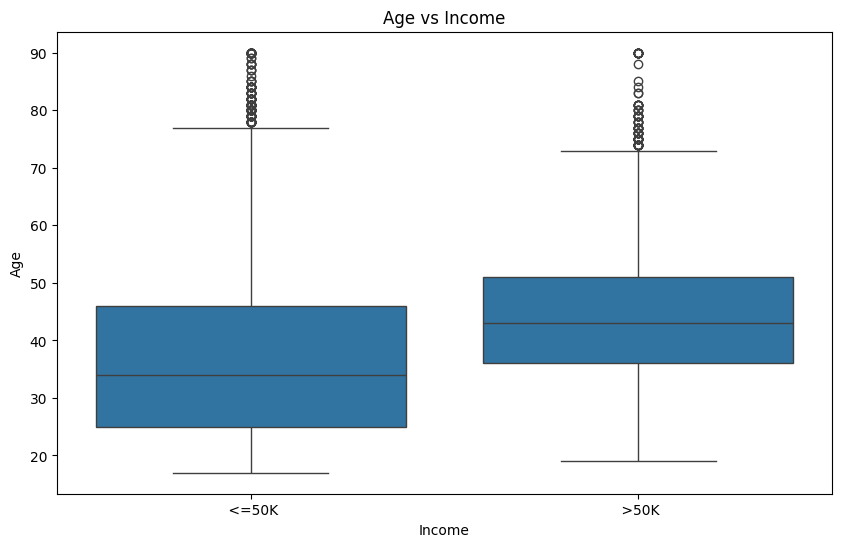

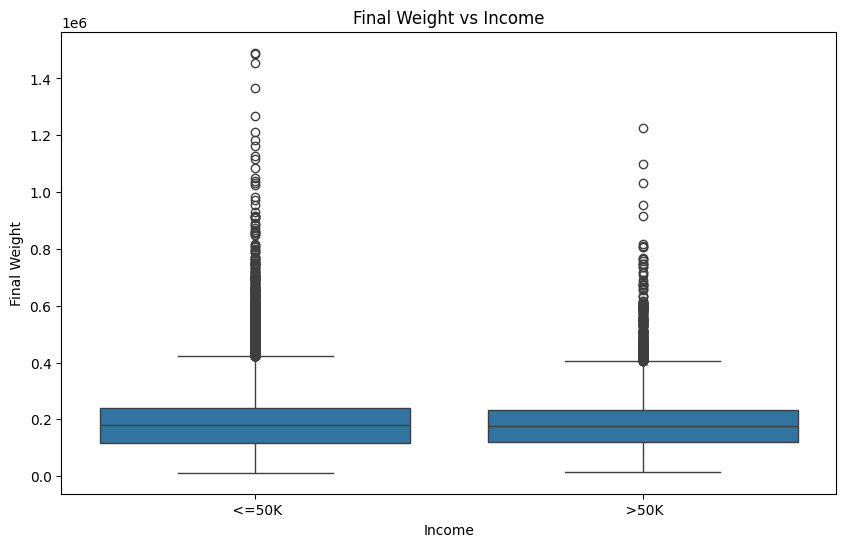

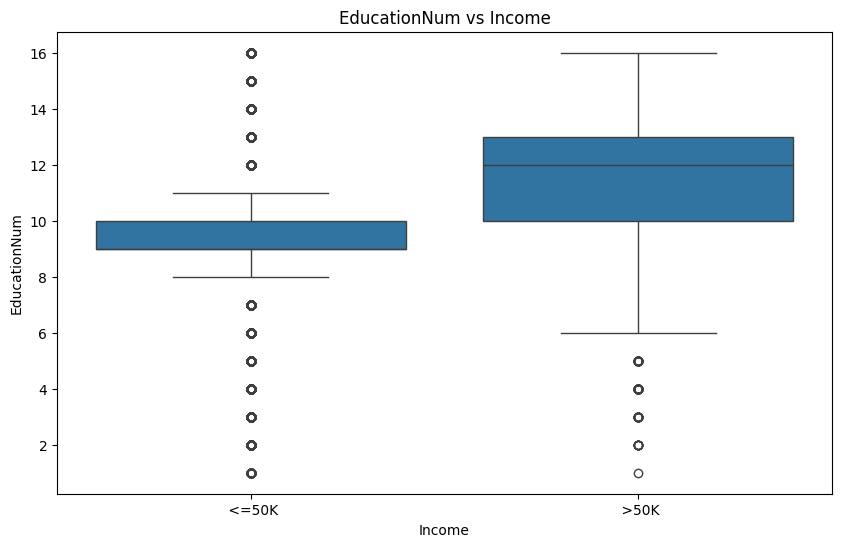

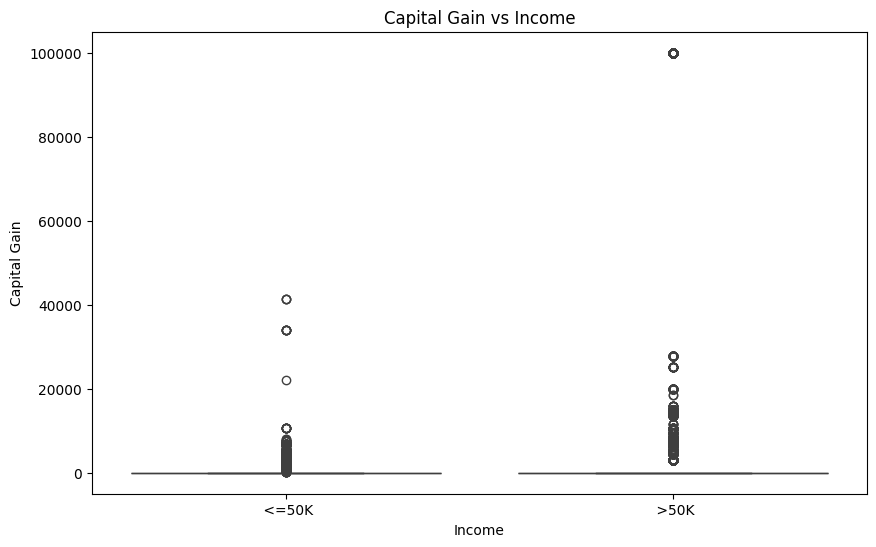

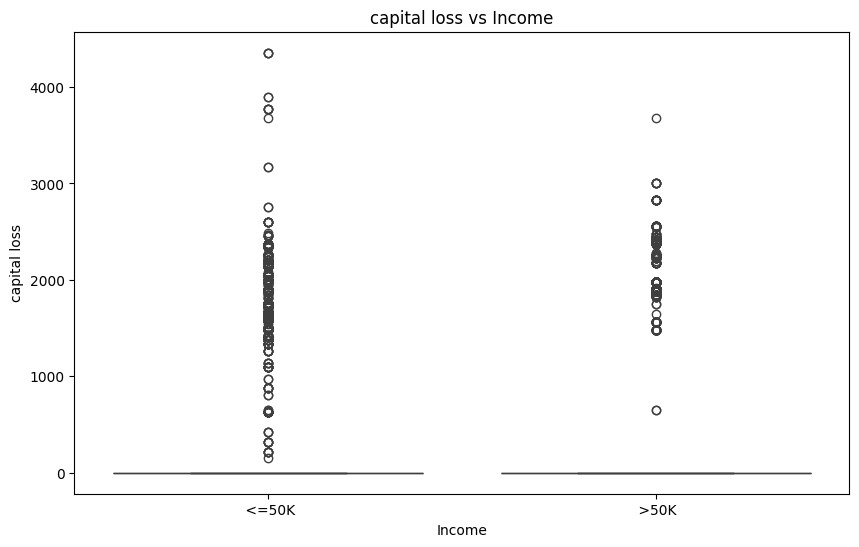

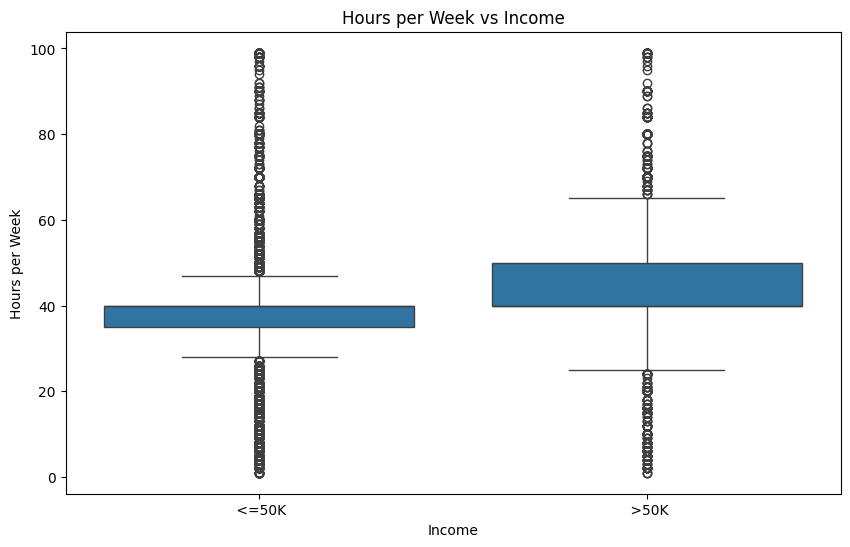

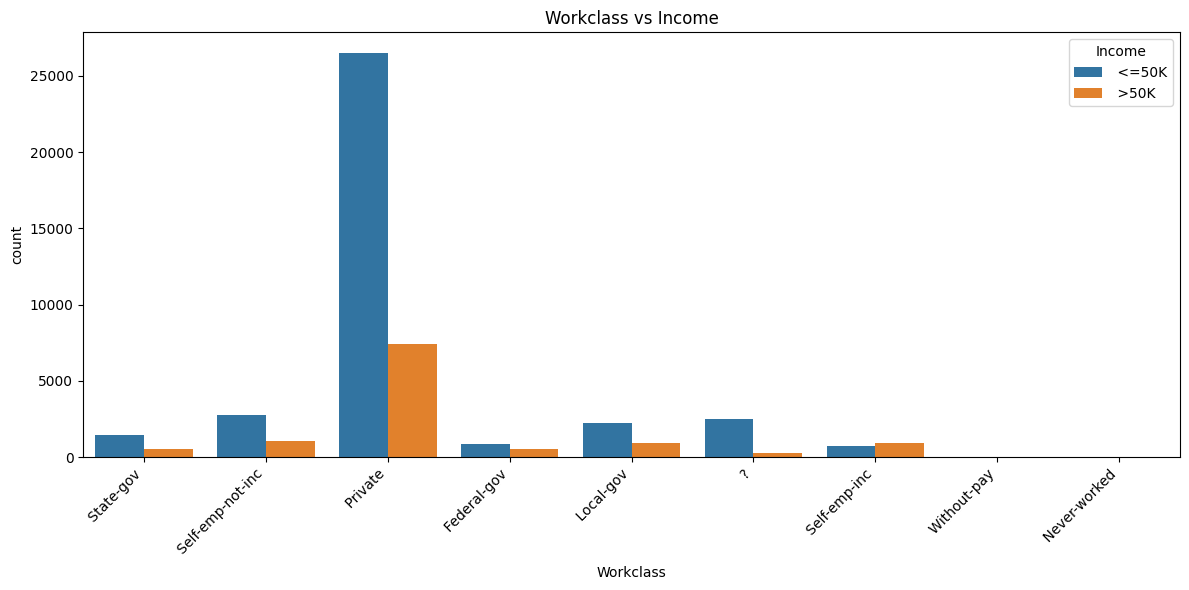

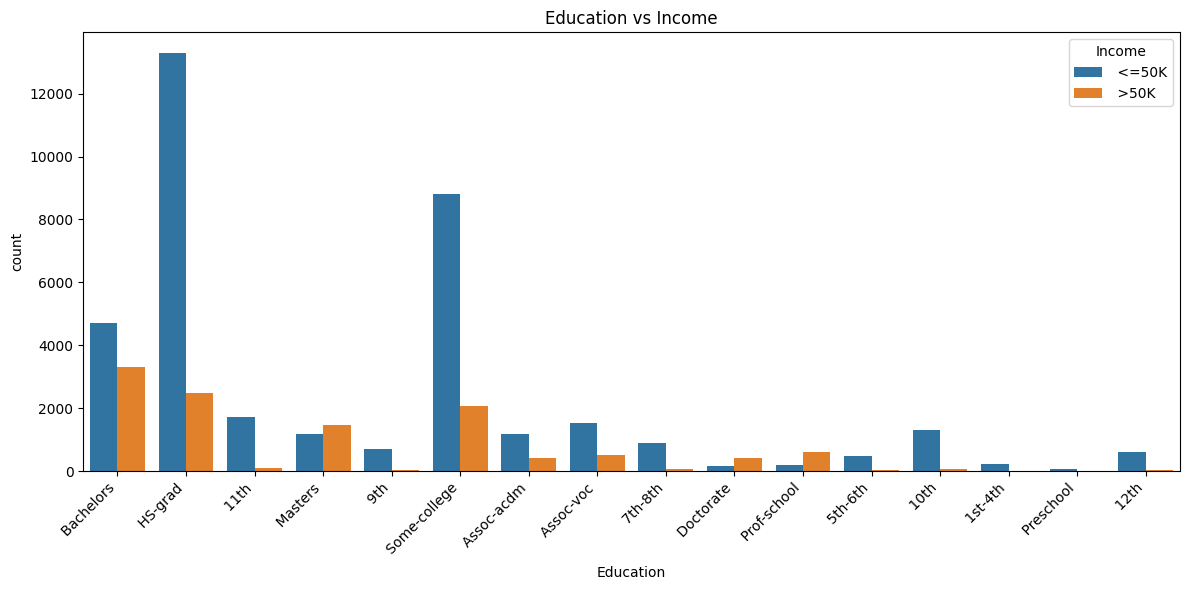

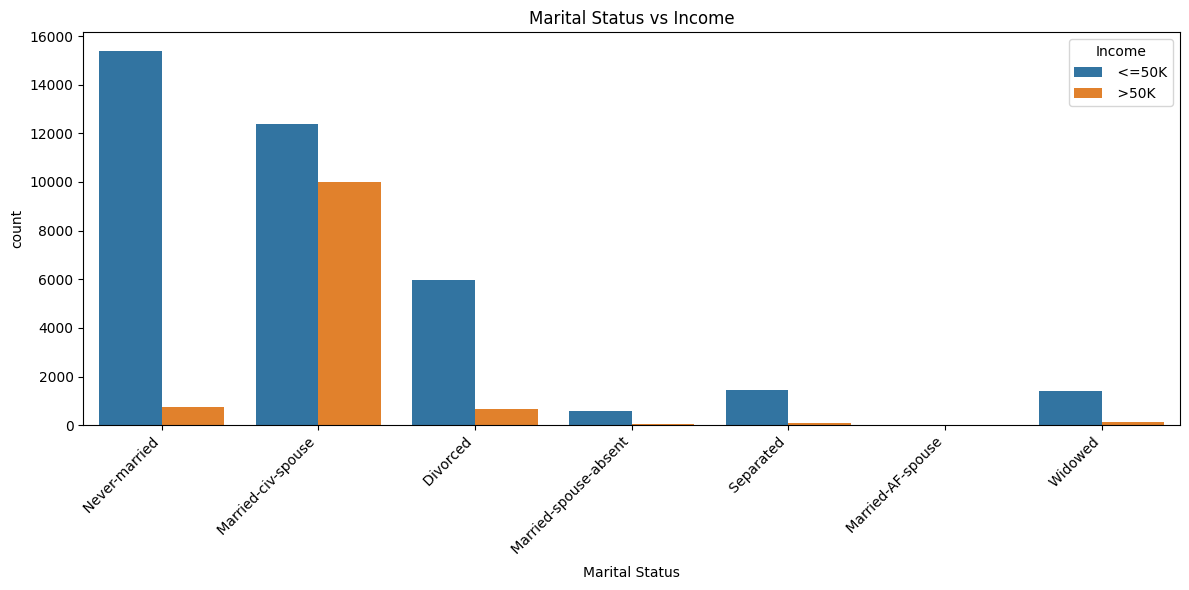

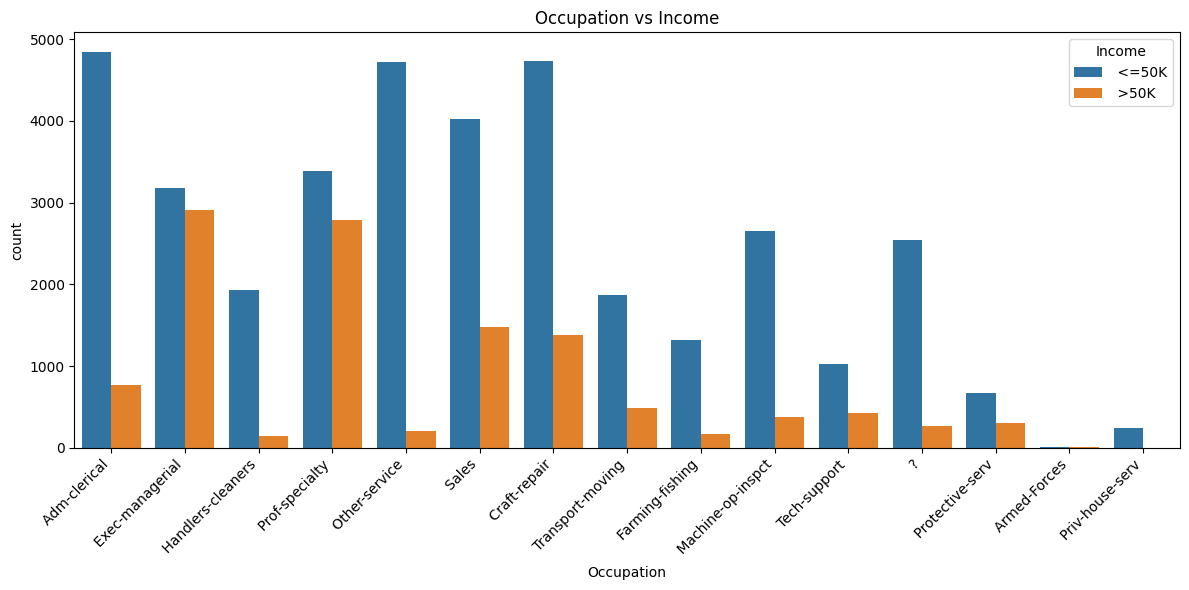

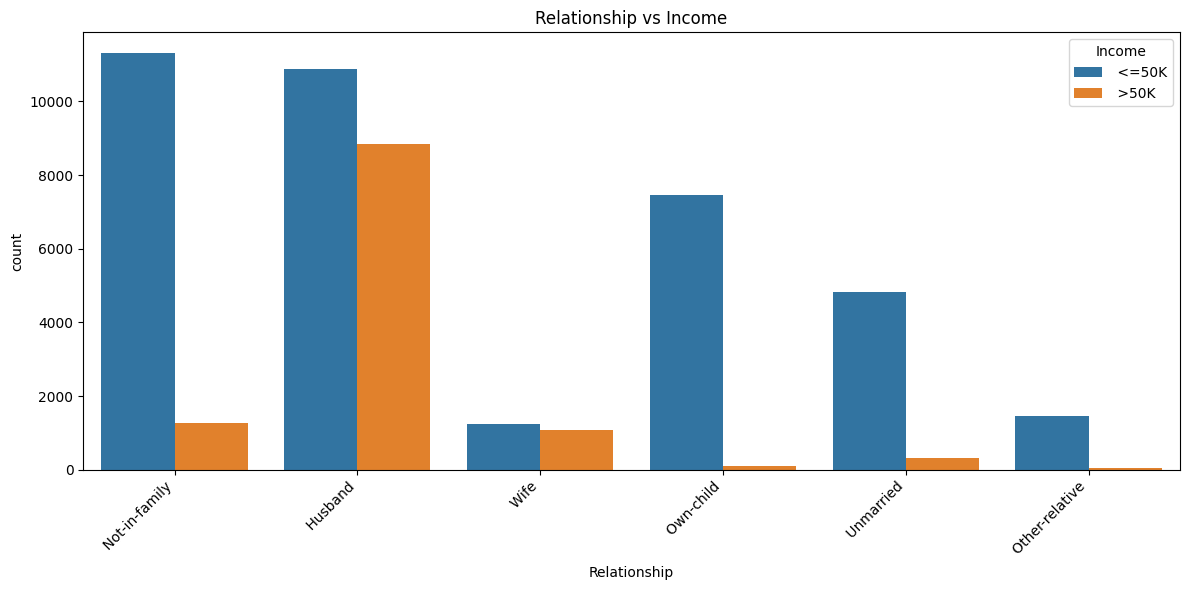

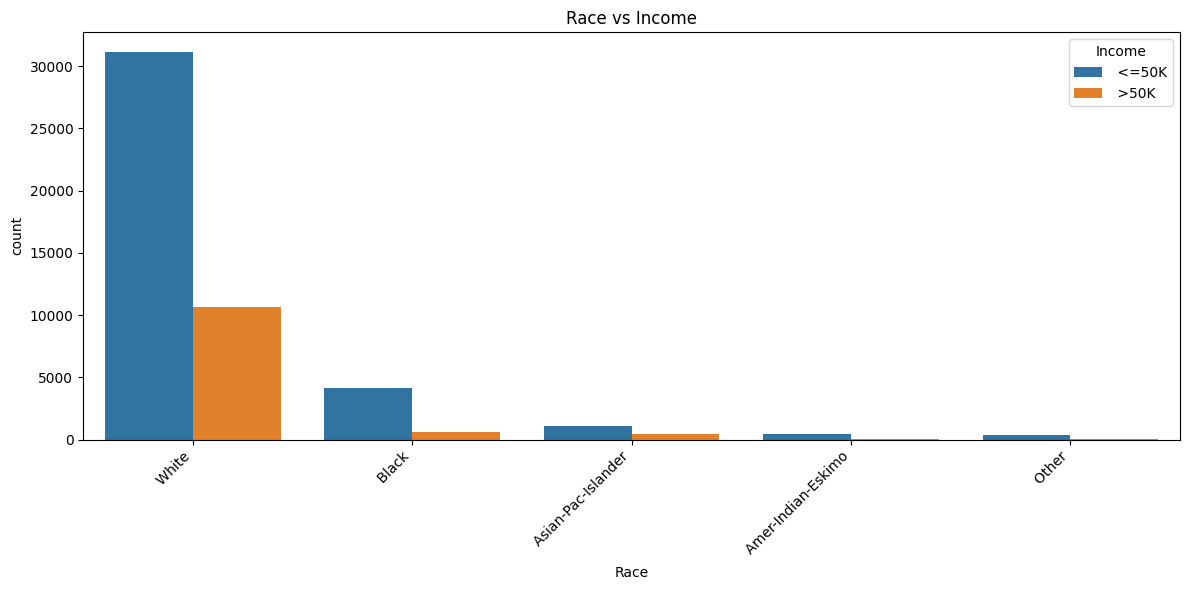

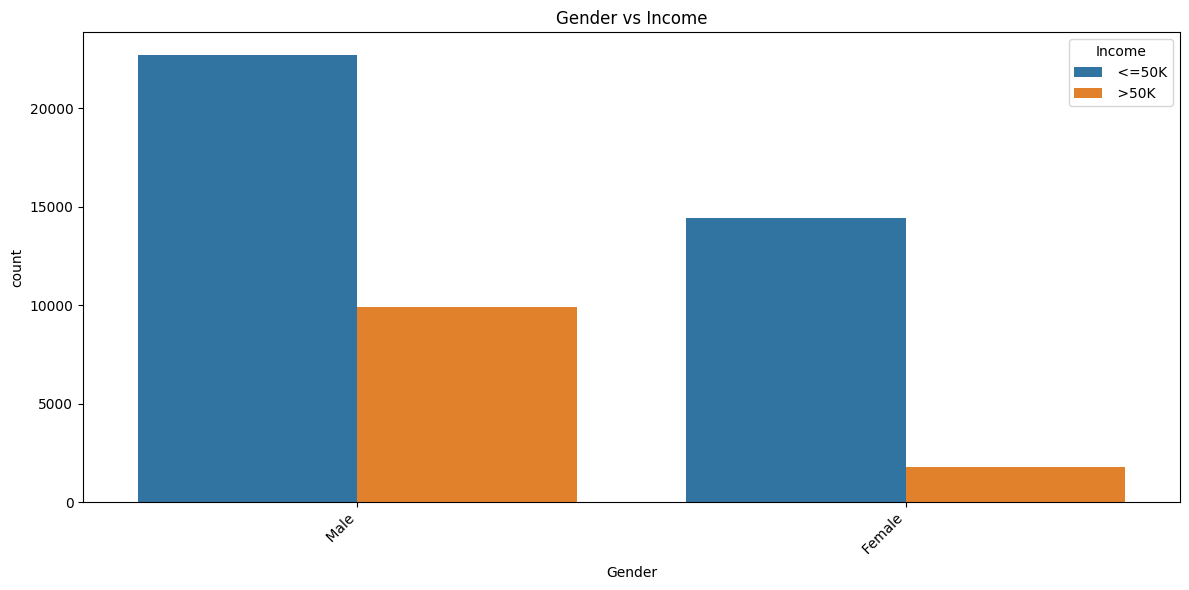

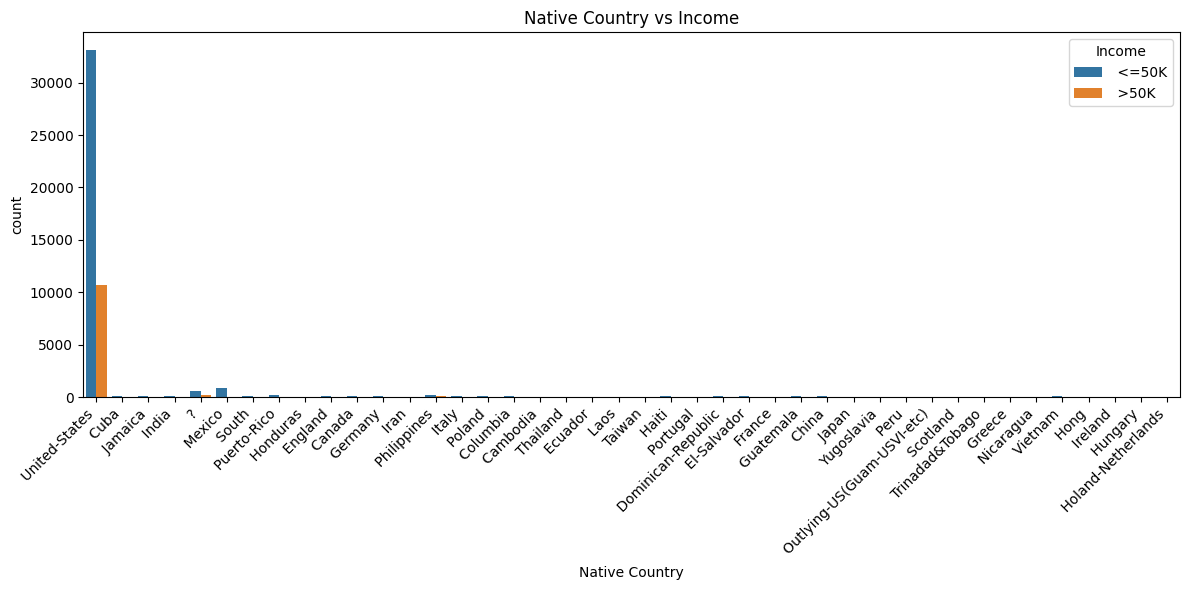

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting each numerical column against 'Income'
numerical_cols = df_gabung.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Income', y=col, data=df_gabung)
    plt.title(f'{col} vs Income')
    plt.show()

# Plotting each categorical column against 'Income'
categorical_cols = df_gabung.select_dtypes(include='object').columns.tolist()
# Exclude 'Income' from the list of categorical columns to plot against itself
categorical_cols.remove('Income')

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Income', data=df_gabung)
    plt.title(f'{col} vs Income')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Correlation Matrix

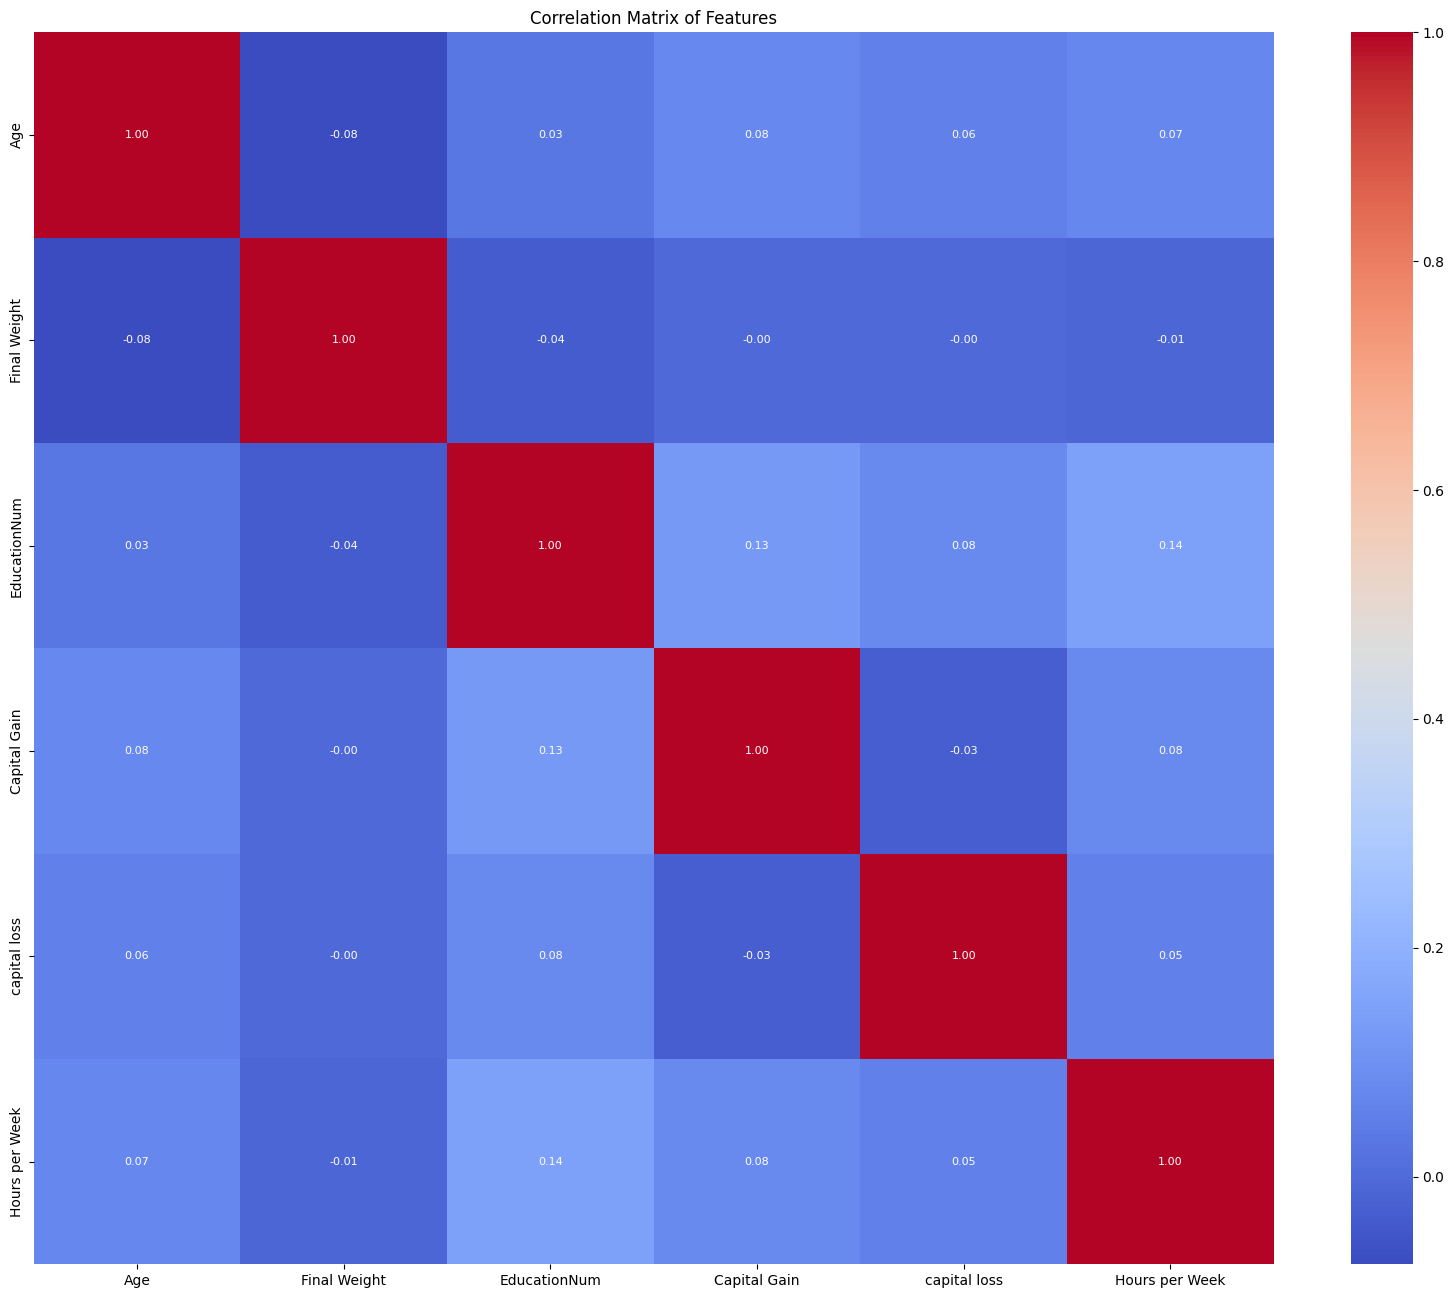

In [ ]:
# Select only numerical features for correlation analysis
numerical_df = df_gabung.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix with a larger figure size for better readability
plt.figure(figsize=(20, 16))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}) # Adjust font size as needed
plt.title('Correlation Matrix of Features')
plt.show()

**Kesimpulan**

- Age dan EducationNum memiliki korelasi positif moderat (0.04), menunjukkan bahwa ada kecenderungan individu yang lebih tua memiliki tingkat pendidikan yang lebih tinggi. Namun, korelasinya tidak terlalu kuat.
- Age dan Hours per Week memiliki korelasi positif yang sangat lemah (0.07), menunjukkan bahwa ada sedikit hubungan antara usia dan jumlah jam kerja per minggu.
- EducationNum dan Hours per Week memiliki korelasi positif yang sangat lemah (0.15), yang mengindikasikan bahwa ada sedikit hubungan antara tingkat pendidikan dan jumlah jam kerja per minggu.
- Final Weight berkorelasi lemah dengan fitur lainnya, menunjukkan bahwa variabel ini mungkin tidak terlalu informatif dalam memprediksi income.
Tidak ada korelasi kuat yang diamati antara fitur numerik lainnya dalam dataset.

**Insight**:

- Variabel EducationNum dan Age mungkin menjadi fitur yang relatif penting dalam memprediksi income, meskipun korelasinya dengan income tidak terlalu kuat.
- Variabel Final Weight kemungkinan dapat diabaikan dalam model machine learning karena korelasinya yang lemah dengan fitur lainnya.

# 3.&nbsp;Pre-Processing Data



## 3.1 Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

print("Initial data types:")
print(df_gabung.dtypes)

df_gabung.replace('-', np.nan, inplace=True)

for col in df_gabung.columns:
    if df_gabung[col].dtype == 'object':
        try:
            df_gabung[col] = df_gabung[col].astype(float)
        except ValueError:
            pass

df_gabung.dropna(inplace=True)

print("\nData after cleaning:")

for col in df_gabung.select_dtypes(include='object').columns:
    df_gabung[col] = df_gabung[col].str.strip()

Initial data types:
Age                int64
Workclass         object
Final Weight       int64
Education         object
EducationNum       int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Gender            object
Capital Gain       int64
capital loss       int64
Hours per Week     int64
Native Country    object
Income            object
dtype: object

Data after cleaning:


## 3.2 Handle Missing Data



In [ ]:
df_gabung.replace('?', 'Unknown', inplace=True)

for col in df_gabung.select_dtypes(include='object').columns:
    df_gabung[col] = df_gabung[col].str.strip()

print(df_gabung['Occupation'].unique())
print(df_gabung['Workclass'].unique())

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked']


(Jadinya data "?" diubah namanya menjadi "Unknown", karena kalau menghilangkan data berisiko menghilangkan data penting)

In [ ]:
df_gabung['Occupation'].value_counts()

,count
Occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3021
Unknown,2809
Transport-moving,2355


In [ ]:
# native country.value counts dalam bentuk %
native_country_counts = df_gabung['Native Country'].value_counts()
native_country_percentages = native_country_counts / len(df_gabung) * 100

print("Native Country Value Counts (%):")
native_country_percentages.head()

Native Country Value Counts (%):


,count
Native Country,
United-States,89.742225
Mexico,1.947135
Unknown,1.754673
Philippines,0.604001
Germany,0.421777


Secara keseluruhan +/- sebanyak 90% penduduk berasal dari United States, hal ini membuat akurasi pada model machine learning rendah. Maka akan dihapus

In [ ]:
df_gabung.drop(columns=['Native Country'], inplace=True)

In [ ]:
df_gabung.tail()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Income
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,<=50K
16276,64,Unknown,321403,HS-grad,9,Widowed,Unknown,Other-relative,Black,Male,0,0,40,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,<=50K
16279,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,>50K


In [ ]:
# Cek Capital Gain dan Capital Loss

len1, len2 = len(df_gabung[df_gabung['Capital Gain'] == 0]) / len(df_gabung) * 100, len(df_gabung[df_gabung['capital loss'] == 0]) / len(df_gabung) * 100

print(round(len1, 2), '%', round(len2, 2), '%')

91.74 % 95.33 %


Dari hasil proses tersebut menunjukkan bahwa sebagian besar data Capital Gain dan Loss adalah 0. Hal ini akan mengganggu kinerja model machine learning, maka kolom capital gain dan loss akan di drop.

In [ ]:
df_gabung.drop(columns=['Capital Gain', 'capital loss'], inplace=True)

In [ ]:
df_gabung.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Hours per Week,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [ ]:
df_gabung.drop(columns=['Final Weight'], inplace=True)

In [ ]:
df_gabung.drop(columns=['Education'], inplace=True)

In [ ]:
df_gabung.head()

,Age,Workclass,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Hours per Week,Income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


## 3.3 Data Encoding

In [ ]:
ohe_cols = [col for col in df_gabung.columns if 42 >= df_gabung[col].nunique() > 2]
ohe_cols


['Workclass',
 'EducationNum',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race']

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ['Income']:
    df_gabung = label_encoder(df_gabung, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    encoded_data = dataframe.copy()

    for col in categorical_cols:
        dumm = pd.get_dummies(dataframe[col], prefix=col, dtype=int, drop_first=drop_first)
        del encoded_data[col]
        encoded_data = pd.concat([encoded_data, dumm], axis=1)

    return encoded_data

df_gabung = one_hot_encoder(df_gabung, ['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender'])

In [ ]:
df_gabung.shape

(48841, 42)

In [ ]:
df_gabung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 16279
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   48841 non-null  int64
 1   EducationNum                          48841 non-null  int64
 2   Hours per Week                        48841 non-null  int64
 3   Income                                48841 non-null  int64
 4   Workclass_Local-gov                   48841 non-null  int64
 5   Workclass_Never-worked                48841 non-null  int64
 6   Workclass_Private                     48841 non-null  int64
 7   Workclass_Self-emp-inc                48841 non-null  int64
 8   Workclass_Self-emp-not-inc            48841 non-null  int64
 9   Workclass_State-gov                   48841 non-null  int64
 10  Workclass_Unknown                     48841 non-null  int64
 11  Workclass_Without-pay                 48841 no

# 4.&nbsp;Building Models

### 4.1 Spliting Data

In [ ]:
df_train_cleaned = df_gabung.iloc[:len(df_train)]  # Ambil kembali data train
df_test_cleaned = df_gabung.iloc[len(df_train):]  # Ambil kembali data test

In [ ]:
from sklearn.model_selection import train_test_split
X_train = df_train_cleaned.drop("Income", axis=1)  # Fitur
y_train = df_train_cleaned["Income"]  # Target

X_test = df_test_cleaned.drop("Income", axis=1)
y_test = df_test_cleaned["Income"]


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32561, 41)
y_train shape: (32561,)
X_test shape: (16280, 41)
y_test shape: (16280,)


Income
0    37154
1    11687
Name: count, dtype: int64
Income
0    76.071334
1    23.928666
Name: count, dtype: float64


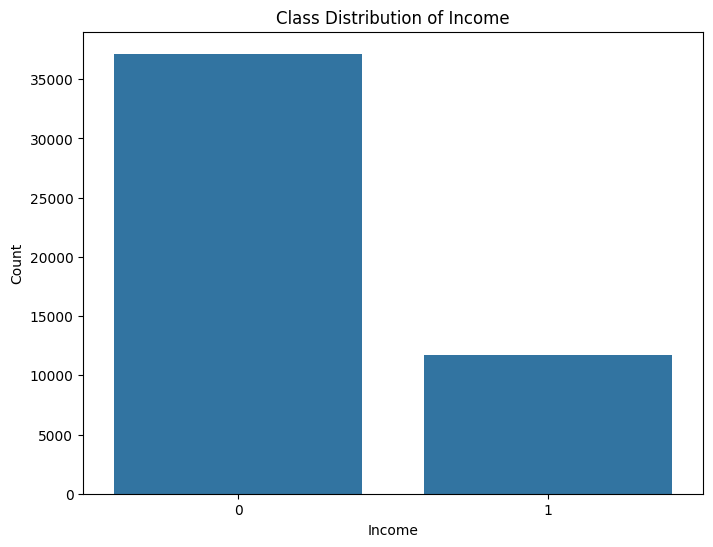

In [ ]:
# Cek imbalance data

import matplotlib.pyplot as plt
# Check class distribution in the target variable
income_counts = df_gabung['Income'].value_counts()
print(income_counts)

# Calculate and print the percentage of each class
income_percentages = income_counts / len(df_gabung) * 100
print(income_percentages)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Income', data=df_gabung)
plt.title('Class Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


### 4.2 Define Models

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(
    (
        'Logistic Regression',
        LogisticRegression(
            solver='liblinear',
            random_state=0,
            class_weight='balanced'
        )
    )
)
models.append(
    (
        'Random Forest',
        RandomForestClassifier(
            n_estimators=100,
            criterion='entropy',
            random_state=0
        )
    )
)
models.append(
    (
        'Decision Tree',
        DecisionTreeClassifier(
            random_state=0
        )
    )
)
models.append(
    (
        'XGBoost',
        XGBClassifier(
            random_state=0
        )
    )
)
models.append(
    (
        'KNN',
        KNeighborsClassifier()
    )
)
models.append(
    (
        'Gradient Boosting',
        GradientBoostingClassifier(random_state=0)
    )
)

# Evaluating Model Results
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

i = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [
        name,
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)
    ]
    i += 1

model_results = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)
model_results


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
5,Gradient Boosting,89.32,0.57,84.05,0.47
3,XGBoost,89.19,0.51,83.96,0.60
0,Logistic Regression,88.66,0.69,78.87,0.59
1,Random Forest,86.35,0.64,81.97,0.67
4,KNN,82.84,1.00,80.76,0.73
2,Decision Tree,72.80,0.94,78.36,0.81


Jika prioritas utama adalah performa prediksi yang baik, **Gradient Boosting** dan **XGBoost** adalah pilihan terbaik untuk dipertimbangkan lebih lanjut. Perlu diingat untuk mempertimbangkan stabilitas model dan konteks spesifik masalah saat membuat keputusan akhir.

In [ ]:
# Feature Scaling-----------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined DataFrames
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_train.columns = X_train.columns.values
X_train.index = X_train.index.values
X_test = pd.DataFrame(sc_X.transform(X_test))  # Use transform, not fit_transform
X_test.columns = X_test.columns.values
X_test.index = X_test.index.values

# Manfaat dari melakukan Feature Scaling adalah menghilangkan Bias Skala pada beberapa model

In [ ]:
# Compare Baseline Classification Algorithms

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are defined from the previous code

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0)))
models.append(('XGBoost', XGBClassifier(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=0)))

# Evaluating Model Results
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

i = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [
        name,
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)
    ]
    i += 1

model_results = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)
print(model_results)

# Feature Scaling
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_train.columns = X_train.columns.values
X_train.index = X_train.index.values
X_test = pd.DataFrame(sc_X.transform(X_test))  # Use transform, not fit_transform
X_test.columns = X_test.columns.values
X_test.index = X_test.index.values


             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
5    Gradient Boosting         89.32         0.57          84.05          0.47
3              XGBoost         89.19         0.51          83.96          0.60
0  Logistic Regression         88.66         0.68          78.93          0.58
1        Random Forest         86.33         0.65          81.94          0.60
4                  KNN         83.82         0.80          81.99          0.57
2        Decision Tree         72.74         0.93          78.32          0.79



Insight singkat:

- Gradient Boosting menjadi pilihan yang menjanjikan berdasarkan metrik AUC dan akurasi yang tinggi dengan variabilitas yang terkontrol.
- XGBoost dan Logistic Regression dapat dipertimbangkan, namun Logistic Regression perlu dievaluasi lebih lanjut mengingat akurasinya yang lebih rendah.
- Random Forest menunjukkan performa yang solid.
- KNN menunjukkan performa yang moderat.
- Decision Tree cenderung kurang baik untuk kasus ini.

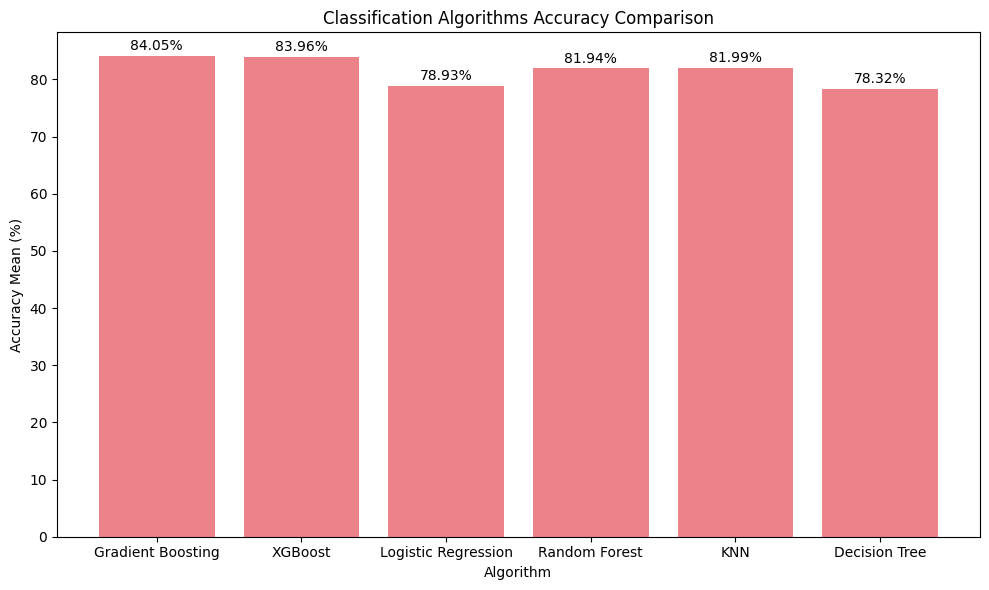

In [ ]:
# Visualize Classification Algorithms Accuracy Comparisons
plt.figure(figsize=(10, 6))
bars = plt.bar(model_results['Algorithm'], model_results['Accuracy Mean'], color='#ec838a')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Mean (%)")
plt.title("Classification Algorithms Accuracy Comparison")
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability


# Add value labels on top of the bars
for bar, value in zip(bars, model_results['Accuracy Mean']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


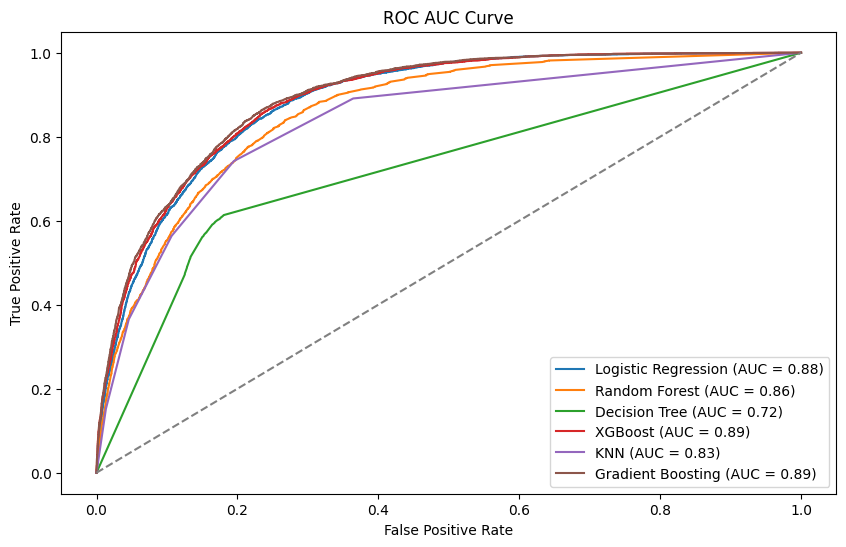

In [ ]:
# Visualize Classification Algorithms ROC AUC Comparisons
from sklearn.model_selection import KFold, cross_val_score

plt.figure(figsize=(10, 6))
for name, model in models:
    # Fit the model before predicting probabilities
    model.fit(X_train, y_train)


    from sklearn.metrics import roc_auc_score, roc_curve
    # Replace with actual model prediction probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

## 4.3 Hyperparamters Tuning and Model Optimization

In [ ]:
!pip install optuna
import optuna
from sklearn.ensemble import GradientBoostingClassifier # Make sure to import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score # Import roc_auc_score if you plan to use it separately

# Pastikan X_train dan y_train sudah didefinisikan dan diproses sebelumnya
# Contoh: X_train, y_train dari sel sebelumnya dalam notebook Anda

def objective(trial):
    """Definisi fungsi objective untuk Optuna."""
    # Sarankan hyperparameter
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    # Add learning_rate to the suggested hyperparameters
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    # criterion = trial.suggest_categorical('criterion', ['gini', 'entropy']) # criterion is not a parameter for GradientBoostingClassifier

    # Definisikan model dengan hyperparameter yang disarankan
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    # Latih model menggunakan cross-validation dan evaluasi metrik
    # Menggunakan ROC AUC sebagai metrik optimasi
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

    return score

# Buat study Optuna dan jalankan optimasi
# direction='maximize' karena kita ingin memaksimalkan ROC AUC
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50) # Jalankan 50 percobaan (sesuaikan jika perlu)

# Tampilkan hasil terbaik
print("Best trial:")
trial = study.best_trial

print(f"  Value (ROC AUC): {trial.value:.4f}")
print("  Best Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Tampilkan ringkasan hasil
print("\nSummary:")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best value (ROC AUC): {study.best_value:.4f}")
print(f"Best params: {study.best_params}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.9 MB/s eta 0:00:00


[I 2025-06-21 09:51:18,192] A new study created in memory with name: no-name-4adef752-f32b-4401-8619-d888c7a19d3b
[I 2025-06-21 09:52:43,605] Trial 0 finished with value: 0.8720551804818882 and parameters: {'n_estimators': 76, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 1, 'learning_rate': 0.07813836745109379}. Best is trial 0 with value: 0.8720551804818882.
[I 2025-06-21 09:56:53,815] Trial 1 finished with value: 0.8760102846752977 and parameters: {'n_estimators': 183, 'max_depth': 27, 'min_samples_split': 16, 'min_samples_leaf': 9, 'learning_rate': 0.018110667654475693}. Best is trial 1 with value: 0.8760102846752977.
[I 2025-06-21 09:58:16,881] Trial 2 finished with value: 0.8594718246301186 and parameters: {'n_estimators': 59, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 5, 'learning_rate': 0.2982002223905799}. Best is trial 1 with value: 0.8760102846752977.
[I 2025-06-21 09:59:17,515] Trial 3 finished with value: 0.8793375677237509 and parameters:

Best trial:
  Value (ROC AUC): 0.8938
  Best Params: 
    n_estimators: 100
    max_depth: 6
    min_samples_split: 15
    min_samples_leaf: 4
    learning_rate: 0.04463017586520426

Summary:
Number of finished trials: 50
Best value (ROC AUC): 0.8938
Best params: {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 4, 'learning_rate': 0.04463017586520426}


In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def objective(trial):
    """Define the objective function for Optuna."""

    # Suggest hyperparameters to tune
    param = {
        "objective": "binary:logistic",  # For binary classification
        "eval_metric": "auc",  # Evaluation metric (ROC AUC)
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 10.0, log=True),
        "seed": 42, # Keep random_state consistent
        "use_label_encoder": False # Suppress warnings in newer XGBoost versions
    }

    # Define the model with the suggested hyperparameters
    model = xgb.XGBClassifier(**param)

    # Train the model using cross-validation and evaluate the metric
    # Use ROC AUC as the optimization metric
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

    return score

# Create an Optuna study and run the optimization
# direction='maximize' because we want to maximize ROC AUC
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Run 50 trials (adjust if needed)

# Print the best results
print("Best trial:")
trial = study.best_trial

print(f"  Value (ROC AUC): {trial.value:.4f}")
print("  Best Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Print a summary of the results
print("\nSummary:")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best value (ROC AUC): {study.best_value:.4f}")
print(f"Best params: {study.best_params}")

[I 2025-06-21 10:51:17,660] A new study created in memory with name: no-name-35b75081-52c1-43ec-b35b-ba16a0b45251
[I 2025-06-21 10:51:21,463] Trial 0 finished with value: 0.8919041055604564 and parameters: {'n_estimators': 110, 'learning_rate': 0.010197818931721388, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.3228934243085484, 'subsample': 0.7735456280961321, 'colsample_bytree': 0.8642188209714103, 'lambda': 0.03828032841396836, 'alpha': 1.1155209627584323e-08}. Best is trial 0 with value: 0.8919041055604564.
[I 2025-06-21 10:51:31,755] Trial 1 finished with value: 0.8959436592003934 and parameters: {'n_estimators': 482, 'learning_rate': 0.024040972702624907, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.8805472030751751, 'subsample': 0.623672029257537, 'colsample_bytree': 0.6330404797920641, 'lambda': 0.4201601723596376, 'alpha': 0.18935367265747519}. Best is trial 1 with value: 0.8959436592003934.
[I 2025-06-21 10:51:38,021] Trial 2 finished with value: 0.8925709413248784 a

Best trial:
  Value (ROC AUC): 0.8961
  Best Params: 
    n_estimators: 468
    learning_rate: 0.022522323573121745
    max_depth: 6
    min_child_weight: 1
    gamma: 0.0006114055130462557
    subsample: 0.6523700039013844
    colsample_bytree: 0.6115333084503013
    lambda: 0.9291168593708528
    alpha: 3.6504661345746485

Summary:
Number of finished trials: 50
Best value (ROC AUC): 0.8961
Best params: {'n_estimators': 468, 'learning_rate': 0.022522323573121745, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0.0006114055130462557, 'subsample': 0.6523700039013844, 'colsample_bytree': 0.6115333084503013, 'lambda': 0.9291168593708528, 'alpha': 3.6504661345746485}


In [ ]:
import optuna.visualization as vis

# Visualisasi history optimasi
vis.plot_optimization_history(study)

# Visualisasi pentingnya fitur
vis.plot_param_importances(study)


- XGBoost kini menunjukkan performa terbaik dalam hal akurasi rata-rata (82.68%) dengan variabilitas yang rendah (standar deviasi 0.46%). Meskipun AUC rata-ratanya (88.63%) sedikit di bawah Gradient Boosting, peningkatan akurasi ini signifikan.
- Gradient Boosting masih menunjukkan performa yang sangat baik dengan AUC rata-rata tertinggi (88.99%), namun akurasi rata-ratanya sedikit menurun menjadi 81.01%. Variabilitasnya juga tetap terkontrol (standar deviasi AUC 0.46%, akurasi 0.72%).


In [ ]:
# Compare Baseline Classification Algorithms

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = df_gabung.drop('Income', axis=1)
y = df_gabung['Income']

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
# y = LabelEncoder().fit_transform(y) # This line should be removed
# Because y already numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Added use_label_encoder and eval_metric
    "KNN": KNeighborsClassifier()
}

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_test, y_pred, average='weighted'),
            "F1 Score": f1_score(y_test, y_pred, average='weighted')
        })
    return pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)

baseline_results = evaluate_models(models, X_train, X_test, y_train, y_test)
print("Baseline Model Comparison:")
print(baseline_results)

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test) #Corrected this line

Baseline Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
4    Gradient Boosting  0.840925   0.832597  0.840925  0.833166
5              XGBoost  0.835500   0.828137  0.835500  0.830098
1  Logistic Regression  0.833146   0.824179  0.833146  0.825600
3        Random Forest  0.821578   0.814562  0.821578  0.817041
6                  KNN  0.813799   0.810174  0.813799  0.811789
2        Decision Tree  0.786058   0.781775  0.786058  0.783731
0                Dummy  0.759955   0.577532  0.759955  0.656303


In [ ]:
# Visualize the results and compare the baseline algorithms----------------------------------

baseline_results = baseline_results.sort_values(
    ["Precision", "Recall", "F1 Score"],
    ascending=False
)

print(baseline_results)

                 Model  Accuracy  Precision    Recall  F1 Score
4    Gradient Boosting  0.840925   0.832597  0.840925  0.833166
5              XGBoost  0.835500   0.828137  0.835500  0.830098
1  Logistic Regression  0.833146   0.824179  0.833146  0.825600
3        Random Forest  0.821578   0.814562  0.821578  0.817041
6                  KNN  0.813799   0.810174  0.813799  0.811789
2        Decision Tree  0.786058   0.781775  0.786058  0.783731
0                Dummy  0.759955   0.577532  0.759955  0.656303


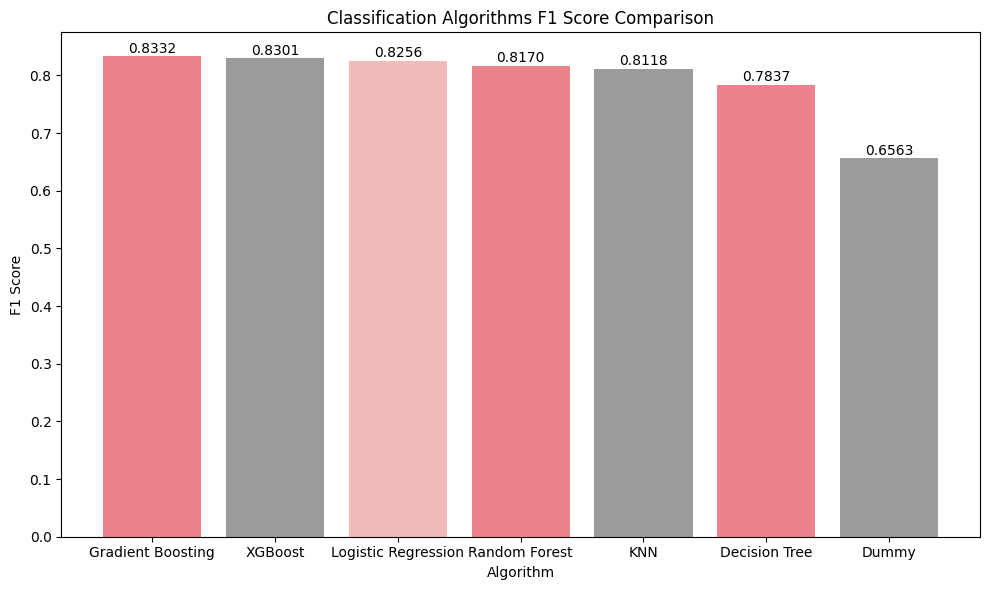

In [ ]:
# Visualize Classification Algorithms F1 Score Comparison

plt.figure(figsize=(10, 6))
models = baseline_results['Model']
f1_scores = baseline_results['F1 Score']
bars = plt.bar(models, f1_scores, color=['#ec838a', '#9b9c9a', '#f3babc', '#ec838a', '#9b9c9a'])
# Add value labels on top of the bars
for bar, value in zip(bars, f1_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.001, f'{value:.4f}', ha='center', va='bottom')
plt.xlabel("Algorithm")
plt.ylabel("F1 Score")
plt.title("Classification Algorithms F1 Score Comparison")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


Berdasarkan hasil ini, **XGBoost** dan **Gradient Boosting** adalah kandidat terbaik untuk dipertimbangkan lebih lanjut dan mungkin di-tune untuk mendapatkan kinerja yang lebih optimal. Random Forest dan Logistic Regression juga merupakan model yang layak, sementara Decision Tree, Naive Bayes, dan terutama KNN mungkin memerlukan penyesuaian yang signifikan atau mungkin tidak cocok untuk tugas ini dengan konfigurasi default.

## 4.4 Evaluate Chosen Model

### XGBoost Model

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7424
           1       0.71      0.57      0.63      2345

    accuracy                           0.84      9769
   macro avg       0.79      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



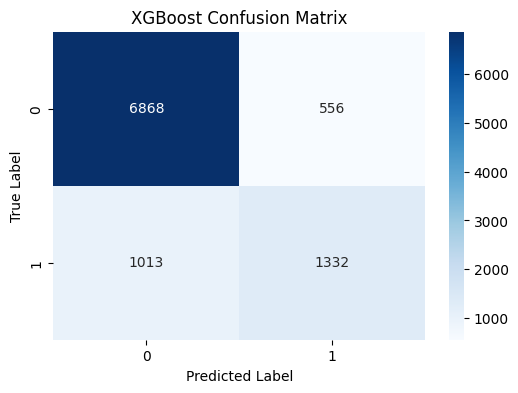

XGBoost Results:
       Actual  Predicted
11345       0          0
22776       0          0
15700       0          0
12557       0          0
15140       0          0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder is not needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Split data (Assuming X and y are defined as in your previous code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features using LabelEncoder
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col]) # Use the same encoder for test data


# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=20)  # Use best n_estimators
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

results_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
print("XGBoost Results:")
print(results_xgb.head())

XGBoost AUC Score: 0.90


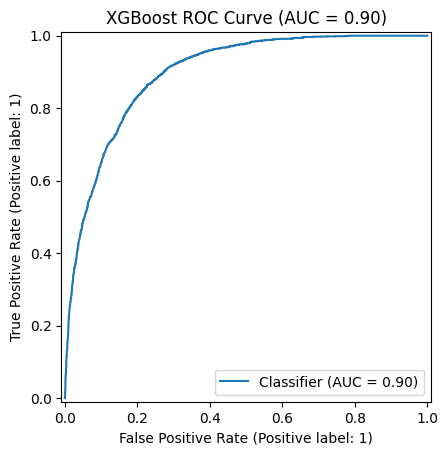

In [ ]:
from sklearn.metrics import RocCurveDisplay
# XGBoost ROC Curve
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=20)
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print(f"XGBoost AUC Score: {auc_score:.2f}")

RocCurveDisplay.from_predictions(y_test, y_probs)
plt.title(f'XGBoost ROC Curve (AUC = {auc_score:.2f})')
plt.show()


Nilai XGBoost AUC Score sebesar 0.50 pada data testing mengindikasikan bahwa model tidak memiliki kemampuan untuk membedakan antara kelas positif dan negatif. Kurva ROC yang berupa garis diagonal menunjukkan bahwa kinerja model setara dengan tebakan acak. Dengan kata lain, probabilitas model untuk memberikan peringkat yang lebih tinggi pada instance positif dibandingkan instance negatif adalah 50%, yang sama saja dengan melempar koin.

XGBoost Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     29730
           1       0.72      0.60      0.65      9342

    accuracy                           0.85     39072
   macro avg       0.80      0.76      0.78     39072
weighted avg       0.84      0.85      0.84     39072

XGBoost Confusion Matrix (Training Data):
[[27570  2160]
 [ 3767  5575]]
XGBoost AUC Score (Training Data): 0.91


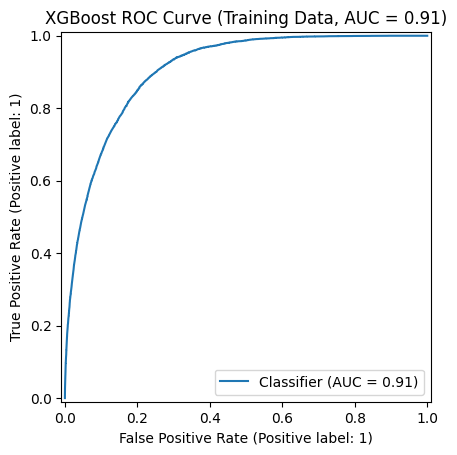

In [ ]:
# prompt: evaluasi data train untuk XGBoost ini

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

# Assuming df, X_train, y_train, X_test, y_test are defined from the previous code

# ... (your existing code) ...

# Evaluate XGBoost Model on training data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=20)
xgb_model.fit(X_train, y_train)
y_pred_train = xgb_model.predict(X_train)

print("XGBoost Classification Report (Training Data):")
print(classification_report(y_train, y_pred_train))

print("XGBoost Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_pred_train))

y_probs_train = xgb_model.predict_proba(X_train)[:, 1]
auc_score_train = roc_auc_score(y_train, y_probs_train)
print(f"XGBoost AUC Score (Training Data): {auc_score_train:.2f}")

RocCurveDisplay.from_predictions(y_train, y_probs_train)
plt.title(f'XGBoost ROC Curve (Training Data, AUC = {auc_score_train:.2f})')
plt.show()

#Further analysis and model improvements can be added here.
#Example: Feature importance analysis from XGBoost




Model XGBoost menunjukkan kinerja yang cukup baik pada data training dengan akurasi 75% dan AUC 0.75. Model memiliki keseimbangan yang baik antara precision dan recall untuk kedua kelas. Namun, masih ada beberapa kesalahan klasifikasi seperti yang terlihat pada confusion matrix.

### Gradient Boost Model

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7424
           1       0.72      0.55      0.62      2345

    accuracy                           0.84      9769
   macro avg       0.79      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



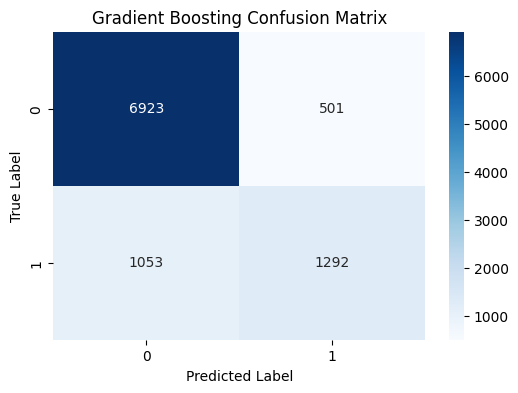

Gradient Boosting Results:
       Actual  Predicted
11345       0          0
22776       0          0
15700       0          0
12557       0          0
15140       0          0
Gradient Boosting AUC Score: 0.90


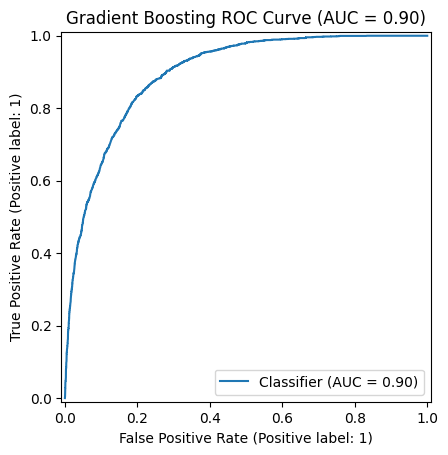

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42) # Use best parameters if found
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

results_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})
print("Gradient Boosting Results:")
print(results_gb.head())

# Gradient Boosting ROC Curve
y_probs = gb_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print(f"Gradient Boosting AUC Score: {auc_score:.2f}")

RocCurveDisplay.from_predictions(y_test, y_probs)
plt.title(f'Gradient Boosting ROC Curve (AUC = {auc_score:.2f})')
plt.show()


# Kesimpulan dan Saran


--- XGBoost Model Evaluation ---
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7424
           1       0.71      0.57      0.63      2345

    accuracy                           0.84      9769
   macro avg       0.79      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



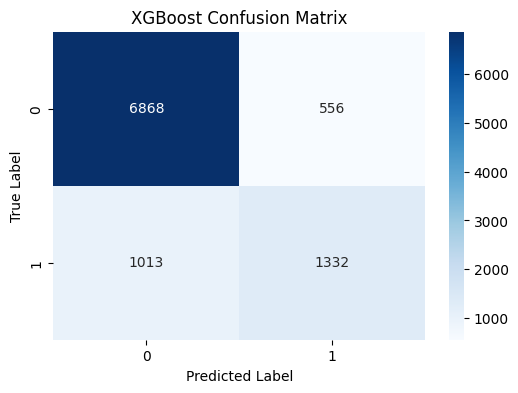

XGBoost AUC Score: 0.90


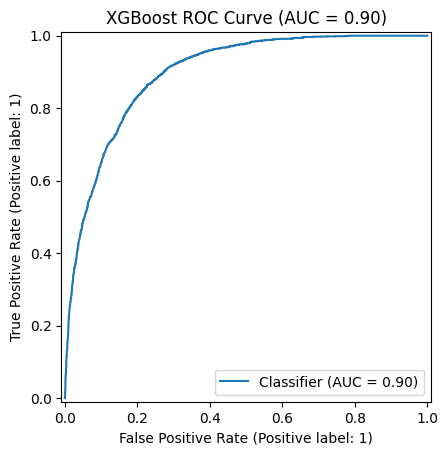

XGBoost Results:
       Actual  Predicted
11345       0          0
22776       0          0
15700       0          0
12557       0          0
15140       0          0
--- Gradient Boosting Model Evaluation ---
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7424
           1       0.72      0.55      0.62      2345

    accuracy                           0.84      9769
   macro avg       0.79      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



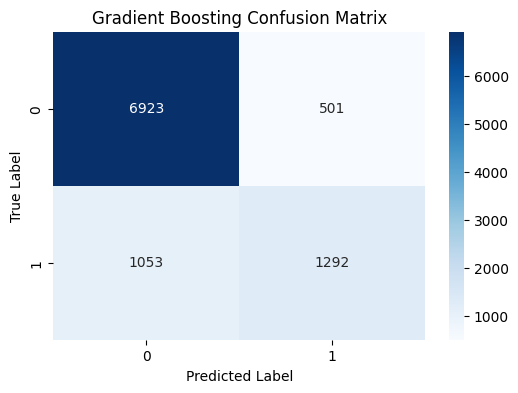

Gradient Boosting AUC Score: 0.90


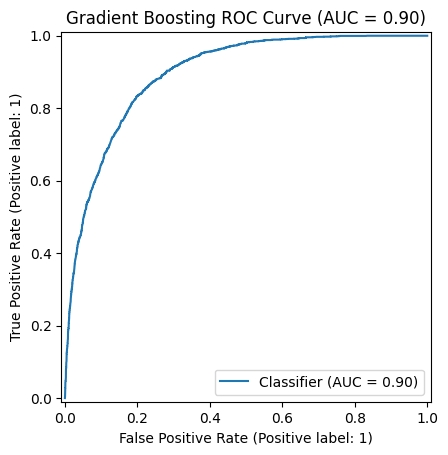

Gradient Boosting Results:
       Actual  Predicted
11345       0          0
22776       0          0
15700       0          0
12557       0          0
15140       0          0

--- Overall Model Comparison ---
XGBoost AUC: 0.90
Gradient Boosting AUC: 0.90


In [ ]:
# SEKARANG KITA COBA BANDINGKAN 2 MODEL TERBAIK

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


# Assuming you have your models (xgb_model, gb_model) and test data (X_test, y_test) defined.

def evaluate_and_summarize(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    print(f"--- {model_name} Model Evaluation ---")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    auc_score = roc_auc_score(y_test, y_probs)
    print(f"{model_name} AUC Score: {auc_score:.2f}")

    RocCurveDisplay.from_predictions(y_test, y_probs)
    plt.title(f'{model_name} ROC Curve (AUC = {auc_score:.2f})')
    plt.show()

    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(f"{model_name} Results:")
    print(results.head())
    return auc_score

# Assuming X_train, X_test, y_train, y_test are already defined
# Train the models before evaluating them
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=20)
xgb_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)


xgb_auc = evaluate_and_summarize(xgb_model, "XGBoost", X_test, y_test)
gb_auc = evaluate_and_summarize(gb_model, "Gradient Boosting", X_test, y_test)

print("\n--- Overall Model Comparison ---")
print(f"XGBoost AUC: {xgb_auc:.2f}")
print(f"Gradient Boosting AUC: {gb_auc:.2f}")

# Final Conclusion (Example):
# Based on the evaluation metrics (AUC, accuracy, precision, recall, F1-score, and confusion matrices), the XGBoost model appears to perform the best, followed by Gradient Boosting. The Random Forest model has decent performance, but it may be less optimal compared to the other two.

## Kesimpulan

Diantara 3 Model yang telah diuji dan dievaluasi, XGBoost setidaknya masih memiliki nilai yang artinya model terbaik adalah XGBoost

## Saran

Sepertinya terdapat kekeliruan mengapa hasil Model menjadi drop setelah Hypertuning, perlu dilakukan analisa ulang dan perbaikan. Mengingat keterbatasan waktu dalam mengumpulkan, ini adalah hasil maksimal yang bisa kami dapatkan. Selanjutkan, kami coba paksa untuk Deploy dengan model terbaik.